# <font style="font-size:40px"><center><b>Machine Learning</b></center></font><font                        style="font-size:30px"><center><b>Master in Computational Finance (MCF) </b></center></font> 

<center> 

# 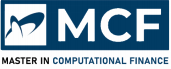

<center/>

# <font color='tomato' style="font-size:40px"><center><b>Homework 1</b></center></font></b></center></font> 

<center>
<b>profesor: </b> Nikola Vasiljevic

<b>students: </b> 
Aleksandar Milinkovic, Milos Milunovic, Nikola Krivacevic
</center>





## Installing and importing libraries:

**Note:** Setting the newer versions of `statsmodels` and `scipy` packages

In [1]:
# Installing additional libraries
!pip install yfinance
!pip install yahoofinancials
!pip install statsmodels=="0.12.0"
!pip install scipy=="1.7.1"

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Standard library
from typing import List

# Third-party libraries
import numpy as np 
import pandas as pd

import scipy
from scipy import stats
from scipy.stats import probplot
from scipy.stats import norm
from scipy.stats.mstats import winsorize

import yfinance as yf 
from yahoofinancials import YahooFinancials
from tabulate import tabulate 

import seaborn as sns
import matplotlib. pyplot as plt 
import plotly.graph_objects as go

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import zivot_andrews
from statsmodels.api import qqplot

## 1. US Stock Market Data

#### Getting the data and performing basic exploratory analysis

Choosing a portfolio of 11 S&P500 stocks from different sectors:
- AEE	(Ameren, Corp, Utilities)
- CBRE	(CBRE, Real Estate)
- AMCR	(Amcor,	Materials)
- ADBE	(Adobe, Information Technology)
- LMT	(Lockheed Martin,	Industrials)
- CVS	(CVS Health, Health Care)
- BK	(BNY Mellon, Financials)
- XOM	(ExxonMobil, Energy)
- KR	(Kroger, Consumer Staples)
- PVH	(PVH,	Consumer Discretionary)
- TWTR (Twitter, Communication Services)




We'll get stock prices from Yahoo Finance. For each company we chose there are following columns:
* `Open/Close`: Opening/Closing stock price
* `High/Low`: Highest/Lowest stock price during trading day
* `Volume`: Nnumber of traded shares
* `Adj Close`: Adjusted closing price (adjusted for stock splits and dividends).


In [4]:
def get_portfolio_asset_returns(stocks:List[str], start:str, end:str) -> pd.DataFrame:
  """Gets portfolio asset daily returns for a give period"""
  stock_data = yf.download(stocks, start, end, progress=False)
  stock_data = stock_data['Close']
  returns = stock_data.pct_change()
  return returns

In [5]:
# Stocks from a different industry sectors
tickers = ["AEE", "CBRE", "AMCR", "ADBE", "LMT", "CVS", "BK", "XOM", "KR", "PVH", "TWTR"]

In [6]:
# Downloading stock prices from Yahoo finance
stocks = yf.download(tickers, group_by='ticker') 

[*********************100%***********************]  11 of 11 completed


In [7]:
# Downloading S&P500 data
snp_500 = yf.download("^GSPC")
snp_500.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [8]:
# 11 stocks
stocks.tail()

AMCR                 ...        XOM                     
             Open    High    Low  ...      Close  Adj Close    Volume
Date                              ...                                
2021-10-21  12.05  12.080  11.92  ...  62.689999  62.689999  16564600
2021-10-22  12.07  12.230  12.05  ...  63.119999  63.119999  14251100
2021-10-25  12.17  12.220  12.06  ...  64.349998  64.349998  17939800
2021-10-26  12.07  12.120  11.97  ...  65.839996  65.839996  25585100
2021-10-27  12.09  12.125  11.95  ...  64.129997  64.129997  21385236

[5 rows x 66 columns]

In [9]:
stocks.head()

AMCR                 ...       XOM                             
           Open High Low Close  ...       Low     Close Adj Close   Volume
Date                            ...                                       
1962-01-02  NaN  NaN NaN   NaN  ...  1.578125  1.578125  0.104368   902400
1962-01-03  NaN  NaN NaN   NaN  ...  1.578125  1.601563  0.105918  1200000
1962-01-04  NaN  NaN NaN   NaN  ...  1.597656  1.605469  0.106176  1088000
1962-01-05  NaN  NaN NaN   NaN  ...  1.566406  1.570313  0.103851  1222400
1962-01-08  NaN  NaN NaN   NaN  ...  1.546875  1.566406  0.103593  1388800

[5 rows x 66 columns]

We can see that `XOM (ExxonMobil)` has the longest time series going back to `1962-01-02`.

Let's see some basic statistics on the columns we have for all of the stocks:

In [10]:
stocks.describe()

AMCR               ...           XOM              
              Open         High  ...     Adj Close        Volume
count  2380.000000  2380.000000  ...  15060.000000  1.506000e+04
mean     10.339819    10.373120  ...     19.210973  8.962096e+06
std       1.211516     1.216326  ...     23.772359  9.270086e+06
min       5.900000     6.230000  ...      0.097181  1.760000e+05
25%       9.560000     9.590000  ...      0.426522  2.542400e+06
50%      10.430000    10.450000  ...      5.606778  5.937000e+06
75%      11.250000    11.300000  ...     38.038416  1.205330e+07
max      12.810000    12.920000  ...     75.004906  1.180235e+08

[8 rows x 66 columns]

Plotting stock prices:

We can now also see from the plot when companies from different sectors went public. Some companies like ExxonMobil and Kroger had an IPO before 60s, following by the CVS and Bank of NY Mellon in 70s, Adobe in 80s and coming to the recent years where tech companies like Twitter went public.

So we have a mixture of companies from different industries with a different age.

In [11]:
# Plotting stock prices over time
fig=go.Figure()
for ticker in tickers:
  fig.add_trace(go.Scatter(x=stocks.index, y=stocks[ticker]["Adj Close"], name=ticker))
fig.update_layout(xaxis_title='Date',yaxis_title='Price',
        title=dict(text='Stocks from 11 sectors ', x=0.5, y=0.87, font=dict(size=22,color='Navy')))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Plotting closing price and simple moving average for our stocks:

By plotting the SMA for the stocks, we remove the short-term price fluctuation to reveal the long term trend. Just by quick visual inspection it seems that at certain times stocks follow a similar trend. We have companies from different industries and with a different age. Over time market conditions were changing and as well as the macro business cycle and industry specific ones. As all companies are within S&P500 index, we would expect to see a some degree of correlation between them. It would be interesting to see the correlation matrix in order to better understand the data.

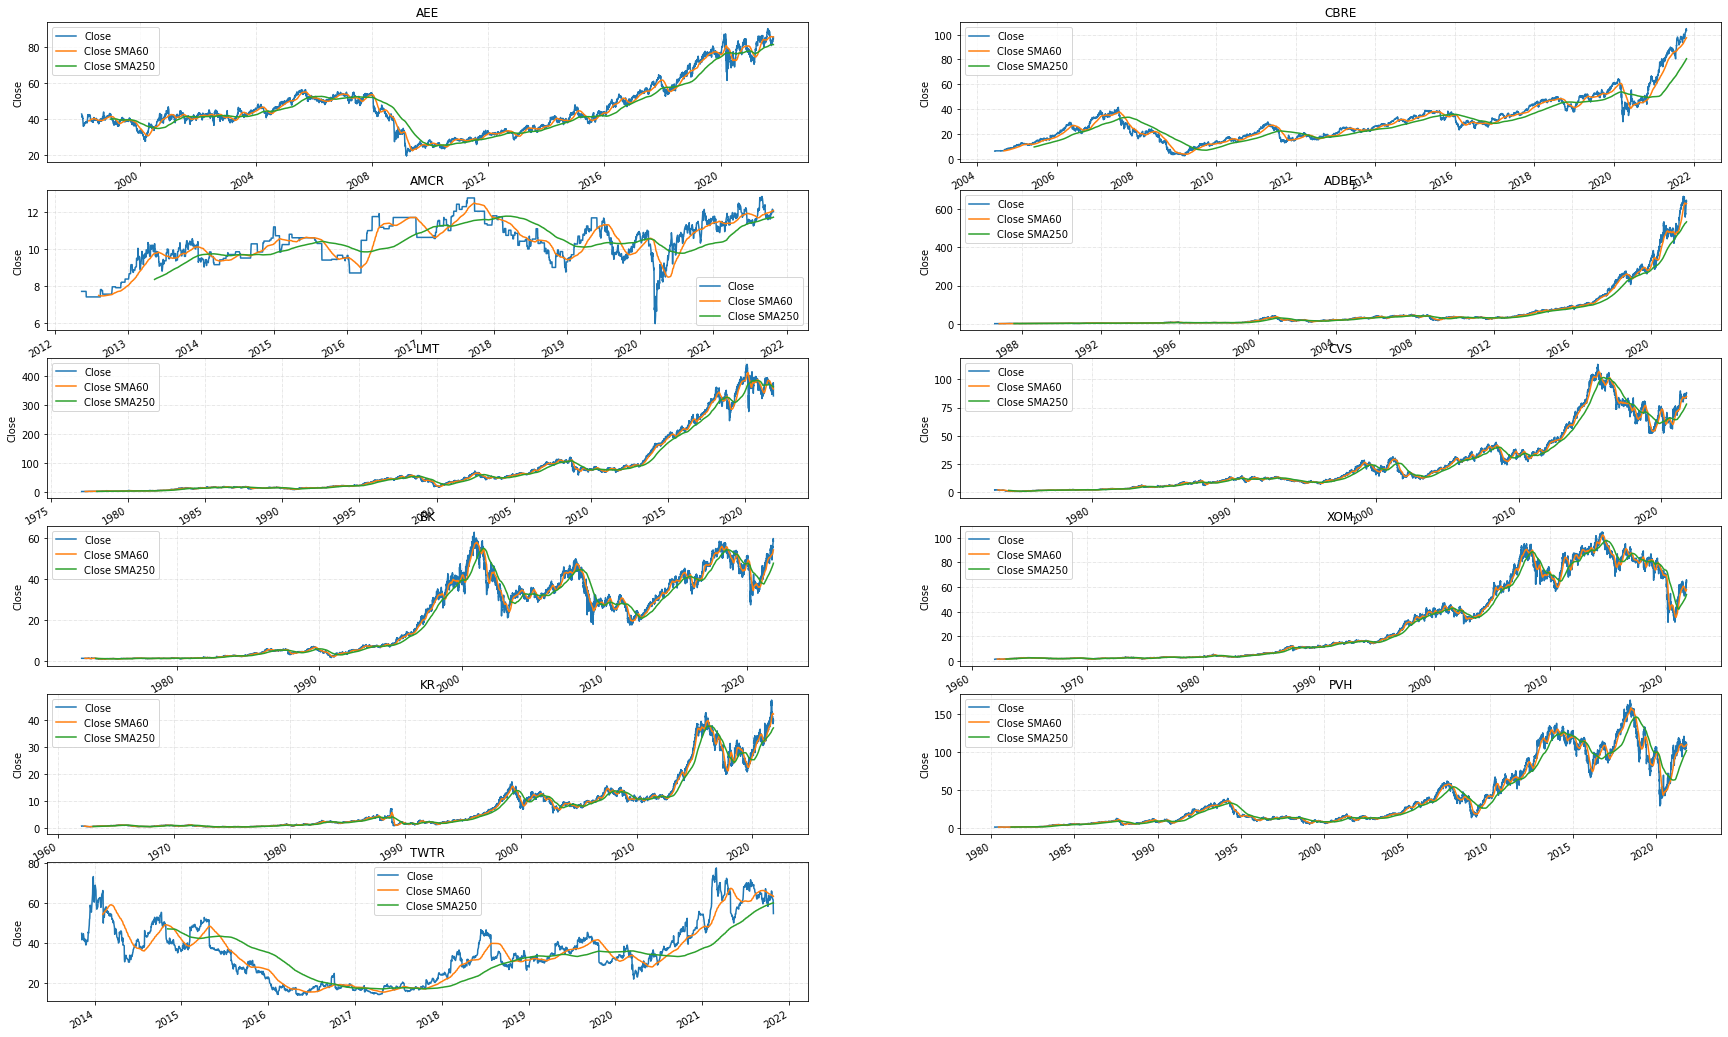

In [12]:
# Plotting closing prices (and simple moving averages)
plt.figure(figsize=(30, 20))

for iticker in range(len(tickers)):
    # Calculate simple moving average (60 and 250 days)
    stocks[tickers[iticker],'Close SMA60'] = (
        stocks[tickers[iticker]]['Close'].rolling(60).mean()) 
    stocks[tickers[iticker],'Close SMA250'] = (
        stocks[tickers[iticker]]['Close'].rolling(250).mean()) 
    # Create subplots
    plt.subplot(6, 2, iticker+1)
    stocks[tickers[iticker]]['Close'].plot(linewidth=1.5)
    stocks[tickers[iticker]]['Close SMA60'].plot(linewidth=1.5)
    stocks[tickers[iticker]]['Close SMA250'].plot(linewidth=1.5)
    # Labels and graphics
    plt.xlabel(None)
    plt.ylabel('Close')
    plt.title(tickers[iticker])
    plt.legend(['Close','Close SMA60','Close SMA250'])
    plt.grid(color='lightgray', linestyle='-.', linewidth=0.5)

Plotting trading volume for each company:

From the volume we can see that there are some periods where most of the our stocks experienced a heavy trading volume. Those are market events that affected the whole market (booms and busts; business cycle). And there are some either industry or company specific event which led to high trading volume for those companies.

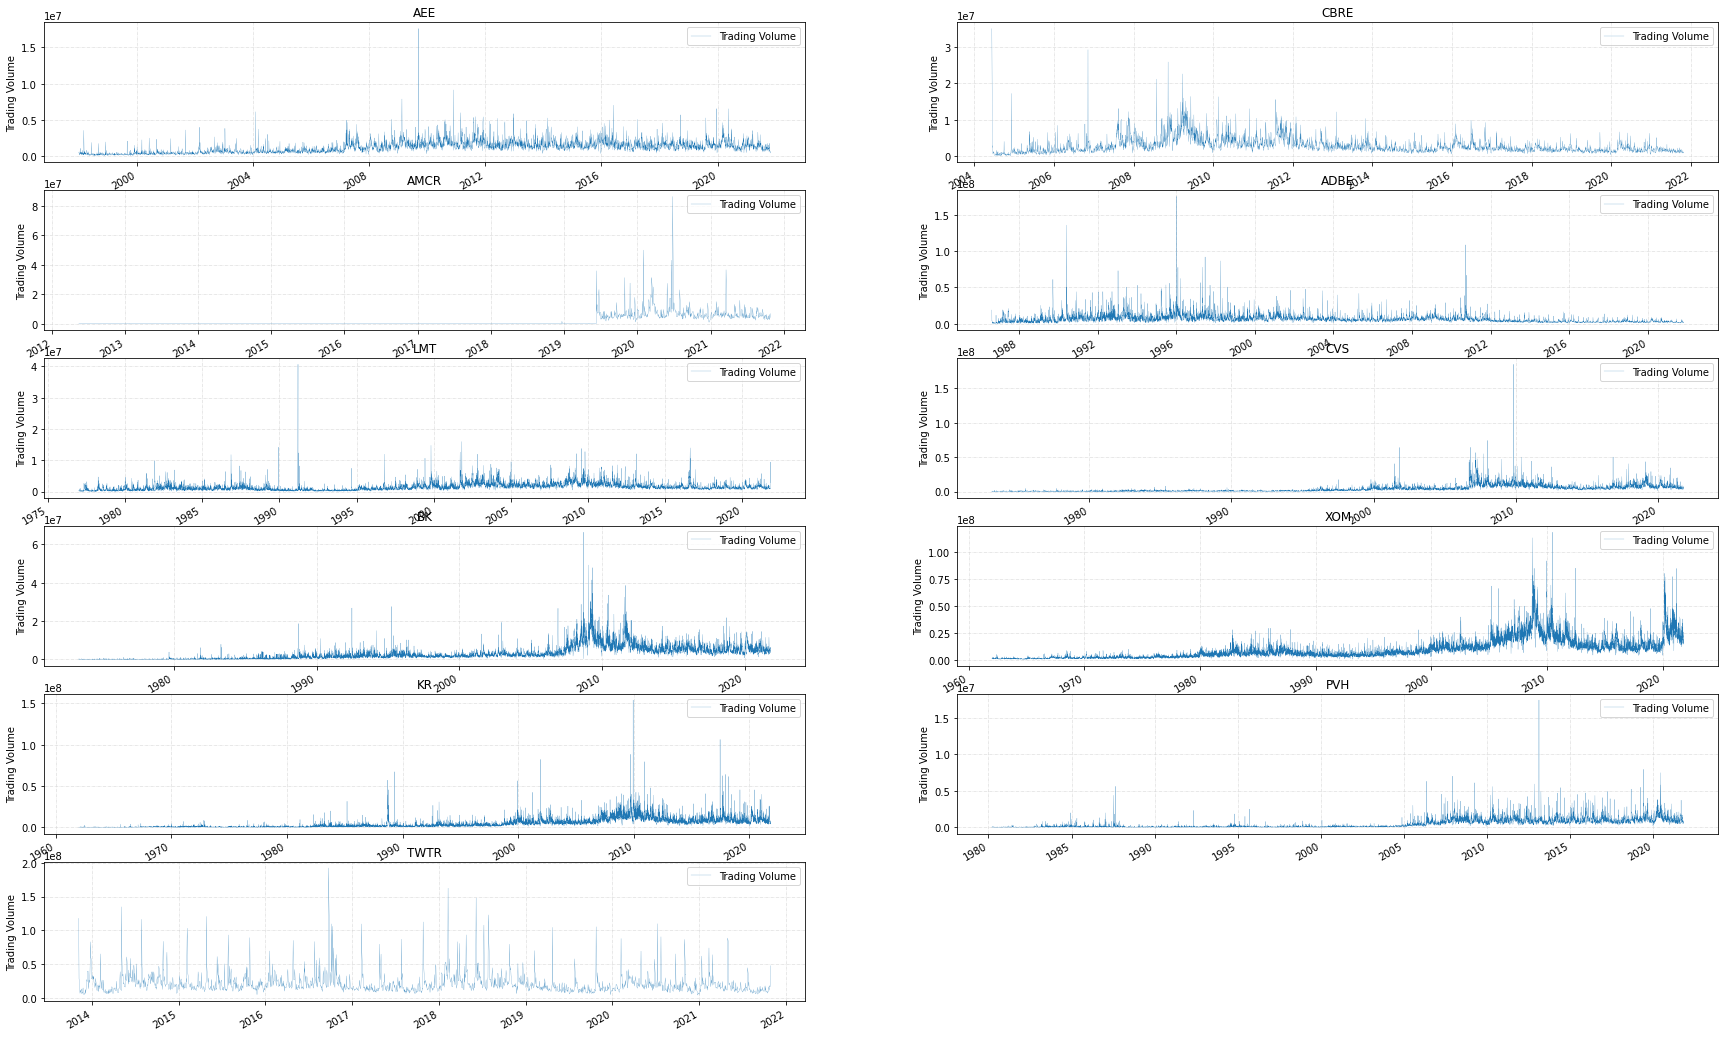

In [13]:
# Plotting trading volume
plt.figure(figsize=(30, 20))

for iticker in range(len(tickers)):
    # Create subplots
    plt.subplot(6, 2, iticker+1)
    stocks[tickers[iticker]]['Volume'].plot(linewidth=0.2)
    # Labels and graphics
    plt.xlabel(None)
    plt.ylabel('Trading Volume')
    plt.title(tickers[iticker])
    plt.legend(['Trading Volume'])
    plt.grid(color='lightgray', linestyle='-.', linewidth=0.5)

Plotting correlation heatmap:

If we look at stock prices it seems that there there is not so much correlation between them. What is also interesting and not so easy to find in any market and useful for hedging purposes is that some stocks exibit a high degree of negative correlation (CVS and XOM). We'll run this and compare for the daily stock returns as well in the last section.

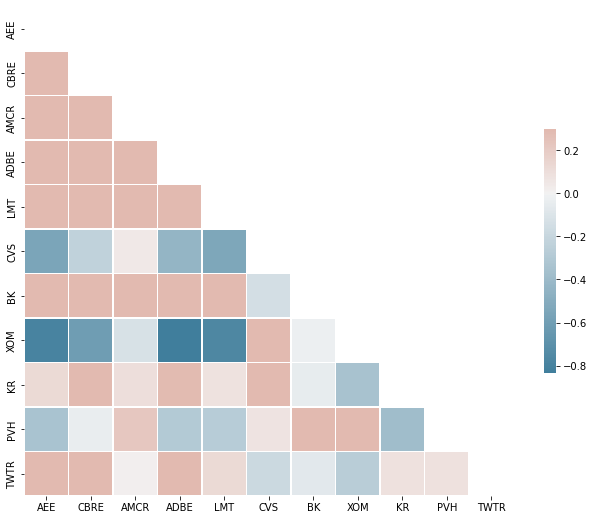

In [14]:
# Correlation matrix based on stock closing prices
closing_prices = pd.DataFrame()
for ticker in tickers:
  closing_prices[ticker] = stocks[ticker]["Close"]
corr = closing_prices.dropna().corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
# Calculating daily stock returns
returns = closing_prices.pct_change()
returns.tail()

,AEE,CBRE,AMCR,ADBE,LMT,CVS,BK,XOM,KR,PVH,TWTR
Date,,,,,,,,,,,
2021-10-21,0.001660,0.001468,-0.000831,0.009947,0.005416,0.003582,0.007250,-0.018168,-0.000509,0.014126,-0.006079
2021-10-22,0.009350,0.015340,0.010806,0.007704,0.003913,0.007598,-0.000502,0.006859,0.023664,-0.006654,-0.048318
2021-10-25,-0.006449,0.009430,-0.006579,0.005267,0.004618,0.001828,-0.005192,0.019487,0.002486,0.002233,-0.002089
2021-10-26,0.007199,-0.002955,-0.005795,-0.006909,-0.118035,0.007299,-0.005051,0.023155,-0.009174,-0.004099,-0.010948
2021-10-27,-0.010312,-0.010230,0.001665,-0.003767,-0.002922,-0.002604,-0.010998,-0.025972,-0.012012,-0.023535,-0.107765


Plotting the daily returns:

In [16]:
# Plotting stock prices over time
fig=go.Figure()
for ticker in tickers:
  fig.add_trace(go.Scatter(x=returns.index, y=returns[ticker], name=ticker))
fig.update_layout(xaxis_title='Date',yaxis_title='Returns',
        title=dict(text='Stocks daily returns ', x=0.5, y=0.87, font=dict(size=22,color='Navy')))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Separate plot for daily returns and SMA of those returns and volatility of returns:

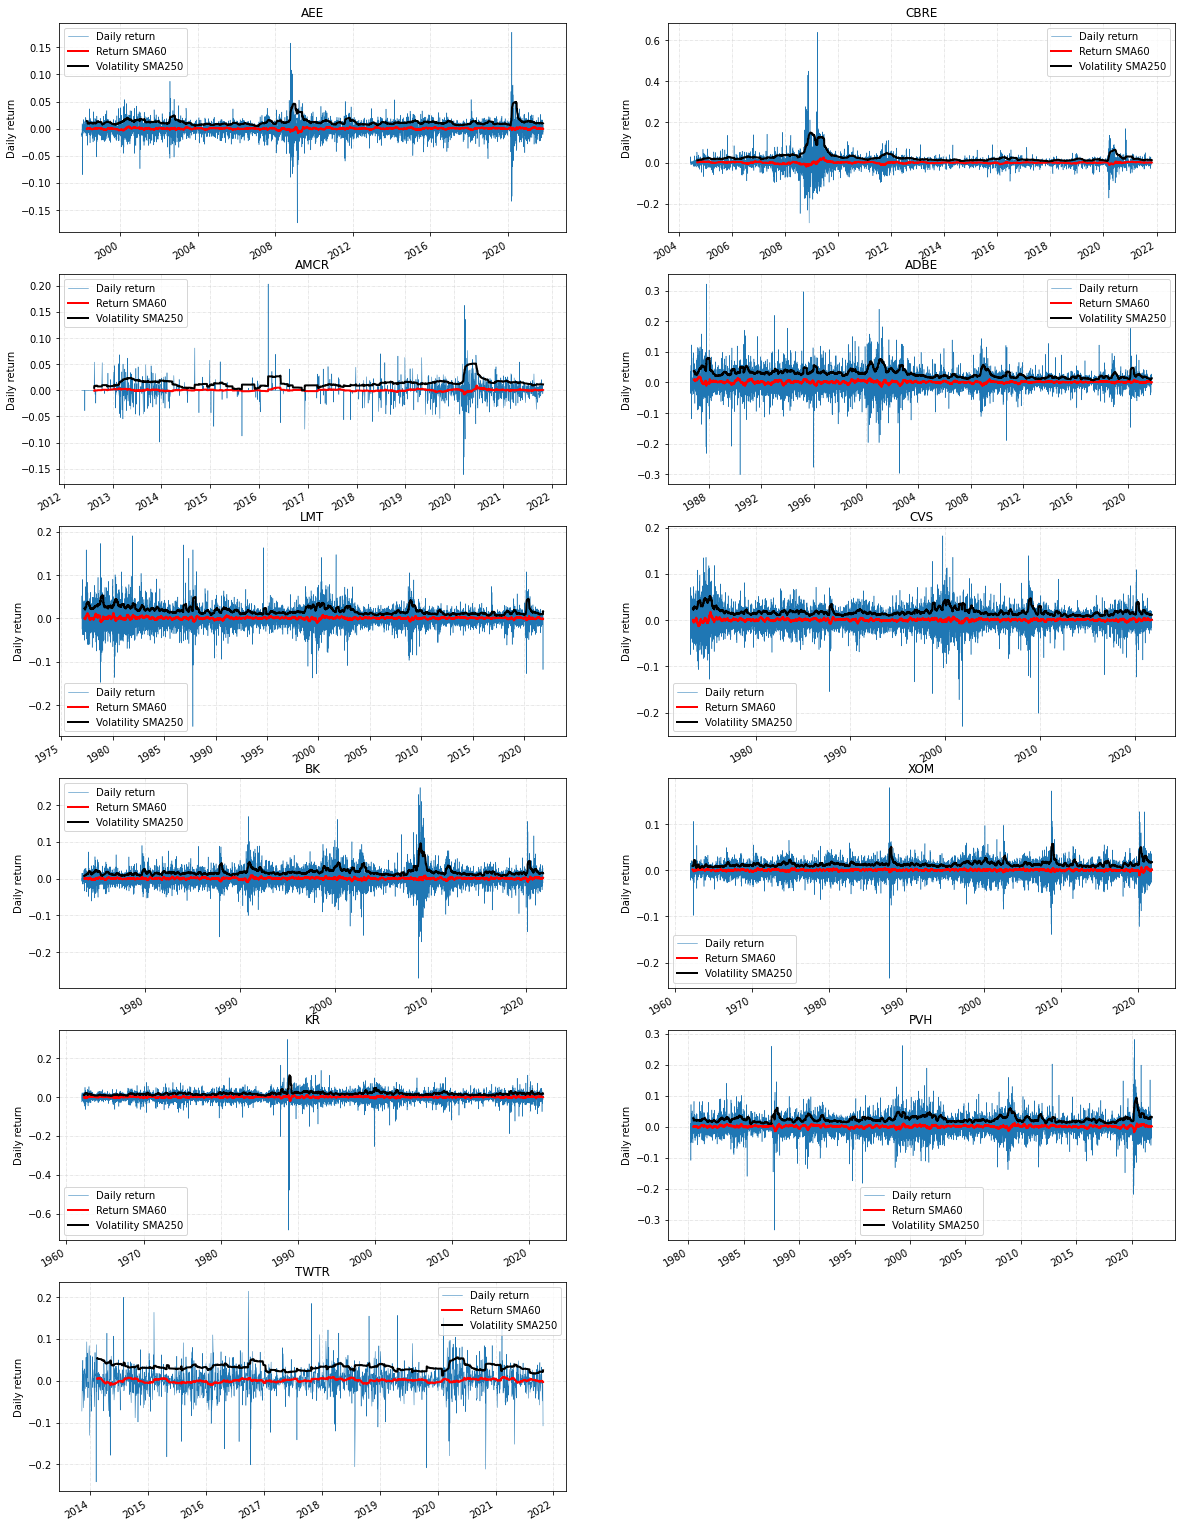

In [17]:
# Plotting returns
plt.figure(figsize=(20, 30))

for i, ticker in enumerate(tickers):
    
    # Calculate rolling mean and standard deviation
    irollmean =  returns[ticker].rolling(65).mean()
    irollvola =  returns[ticker].rolling(65).std()

    # Create subplots
    plt.subplot(6, 2, i + 1)
    returns[ticker].plot(linewidth=0.5)
    irollmean.plot(linewidth=2, color='red')
    irollvola.plot(linewidth=2, color='black')
    
    # Labels and graphics
    plt.xlabel(None)
    plt.ylabel('Daily return')
    plt.title(ticker)
    plt.legend(['Daily return', 'Return SMA60','Volatility SMA250'])
    plt.grid(color='lightgray', linestyle='-.', linewidth=0.5)

Plotting histogram of returns (estimating distribution) against normal distribution:

From the histogram of stock returns and estimated standard normal distribution for those returns we can clearly see that returns don't follow normal distribution. That we can observe only from visual inspection of the plot. We could further do some formal statistical normality tests and calculate skewness or kurtosis to formaly verify that.

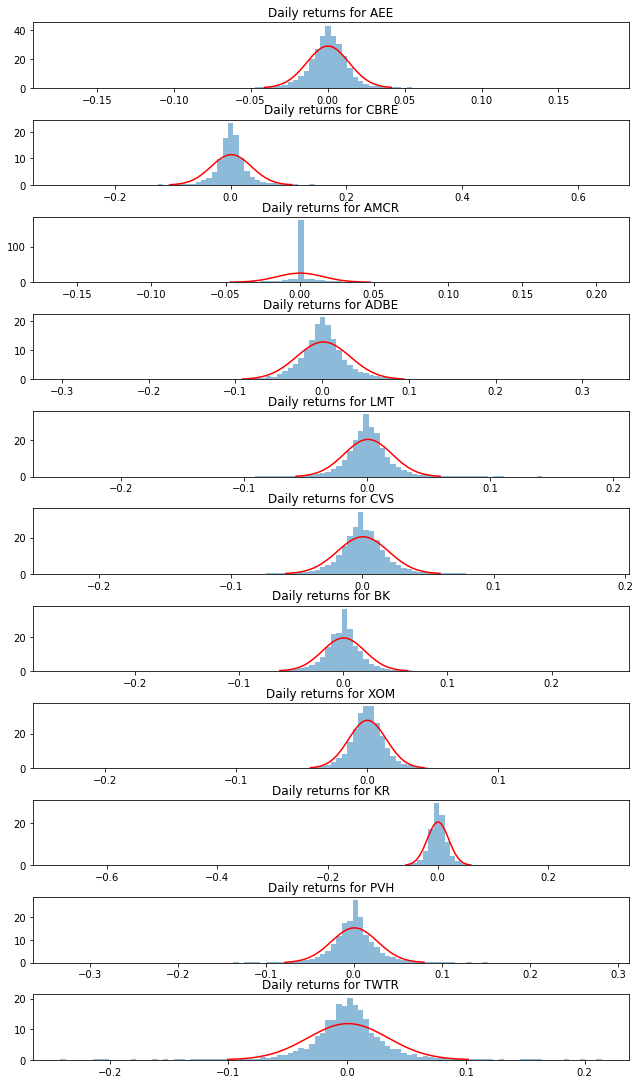

In [18]:
# Histogram of returns (overview of return distribution)
fig, axes = plt.subplots(nrows=11, ncols=1, figsize=(9,15))
fig.tight_layout() 

for i, ticker in enumerate(tickers):
  # New subplot for each stock
  plt.subplot(11, 1, i + 1)
  plt.title(f"Daily returns for {ticker}")

  # Histogram of returns
  plt.hist(returns[ticker], bins=100, density=True, histtype='stepfilled', alpha=0.5)

  # Standard normal for stock returns
  mean = returns[ticker].mean()
  std_dev = returns[ticker].std()
  x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
  plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev),"r")


### (a) Stationarity: Run additional tests, e.g., Kwiatkowski–Phillips–Schmidt–Shin and Zivot–Andrews tests. Consider possible input parameters in the applied methods, briefly describe the tests, and discuss your choices and findings.

Now we’re going to study the stationarity property of returs of our stocks. We’ll perform proper statistical tests to to check if the returns series is non-stationary.

**Stationary process** is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. That means that mean and variance also do not change over time. Example of such process is random walk, random walk with a trend or white noise.

The key properties where stationary and non-stationary processes are different:

- In the long-run stationary series fluctuates around its mean with finite variance.
- Random walk tends to deviate in the long run with infinite variance.
- Random walk with drift tends to drift away from the underlying trend line.
- Trend stationary series fluctuates around its trend in the long run.

#### ACF and PACF plots

Let's plot ACF and PACF plots for stock returns:

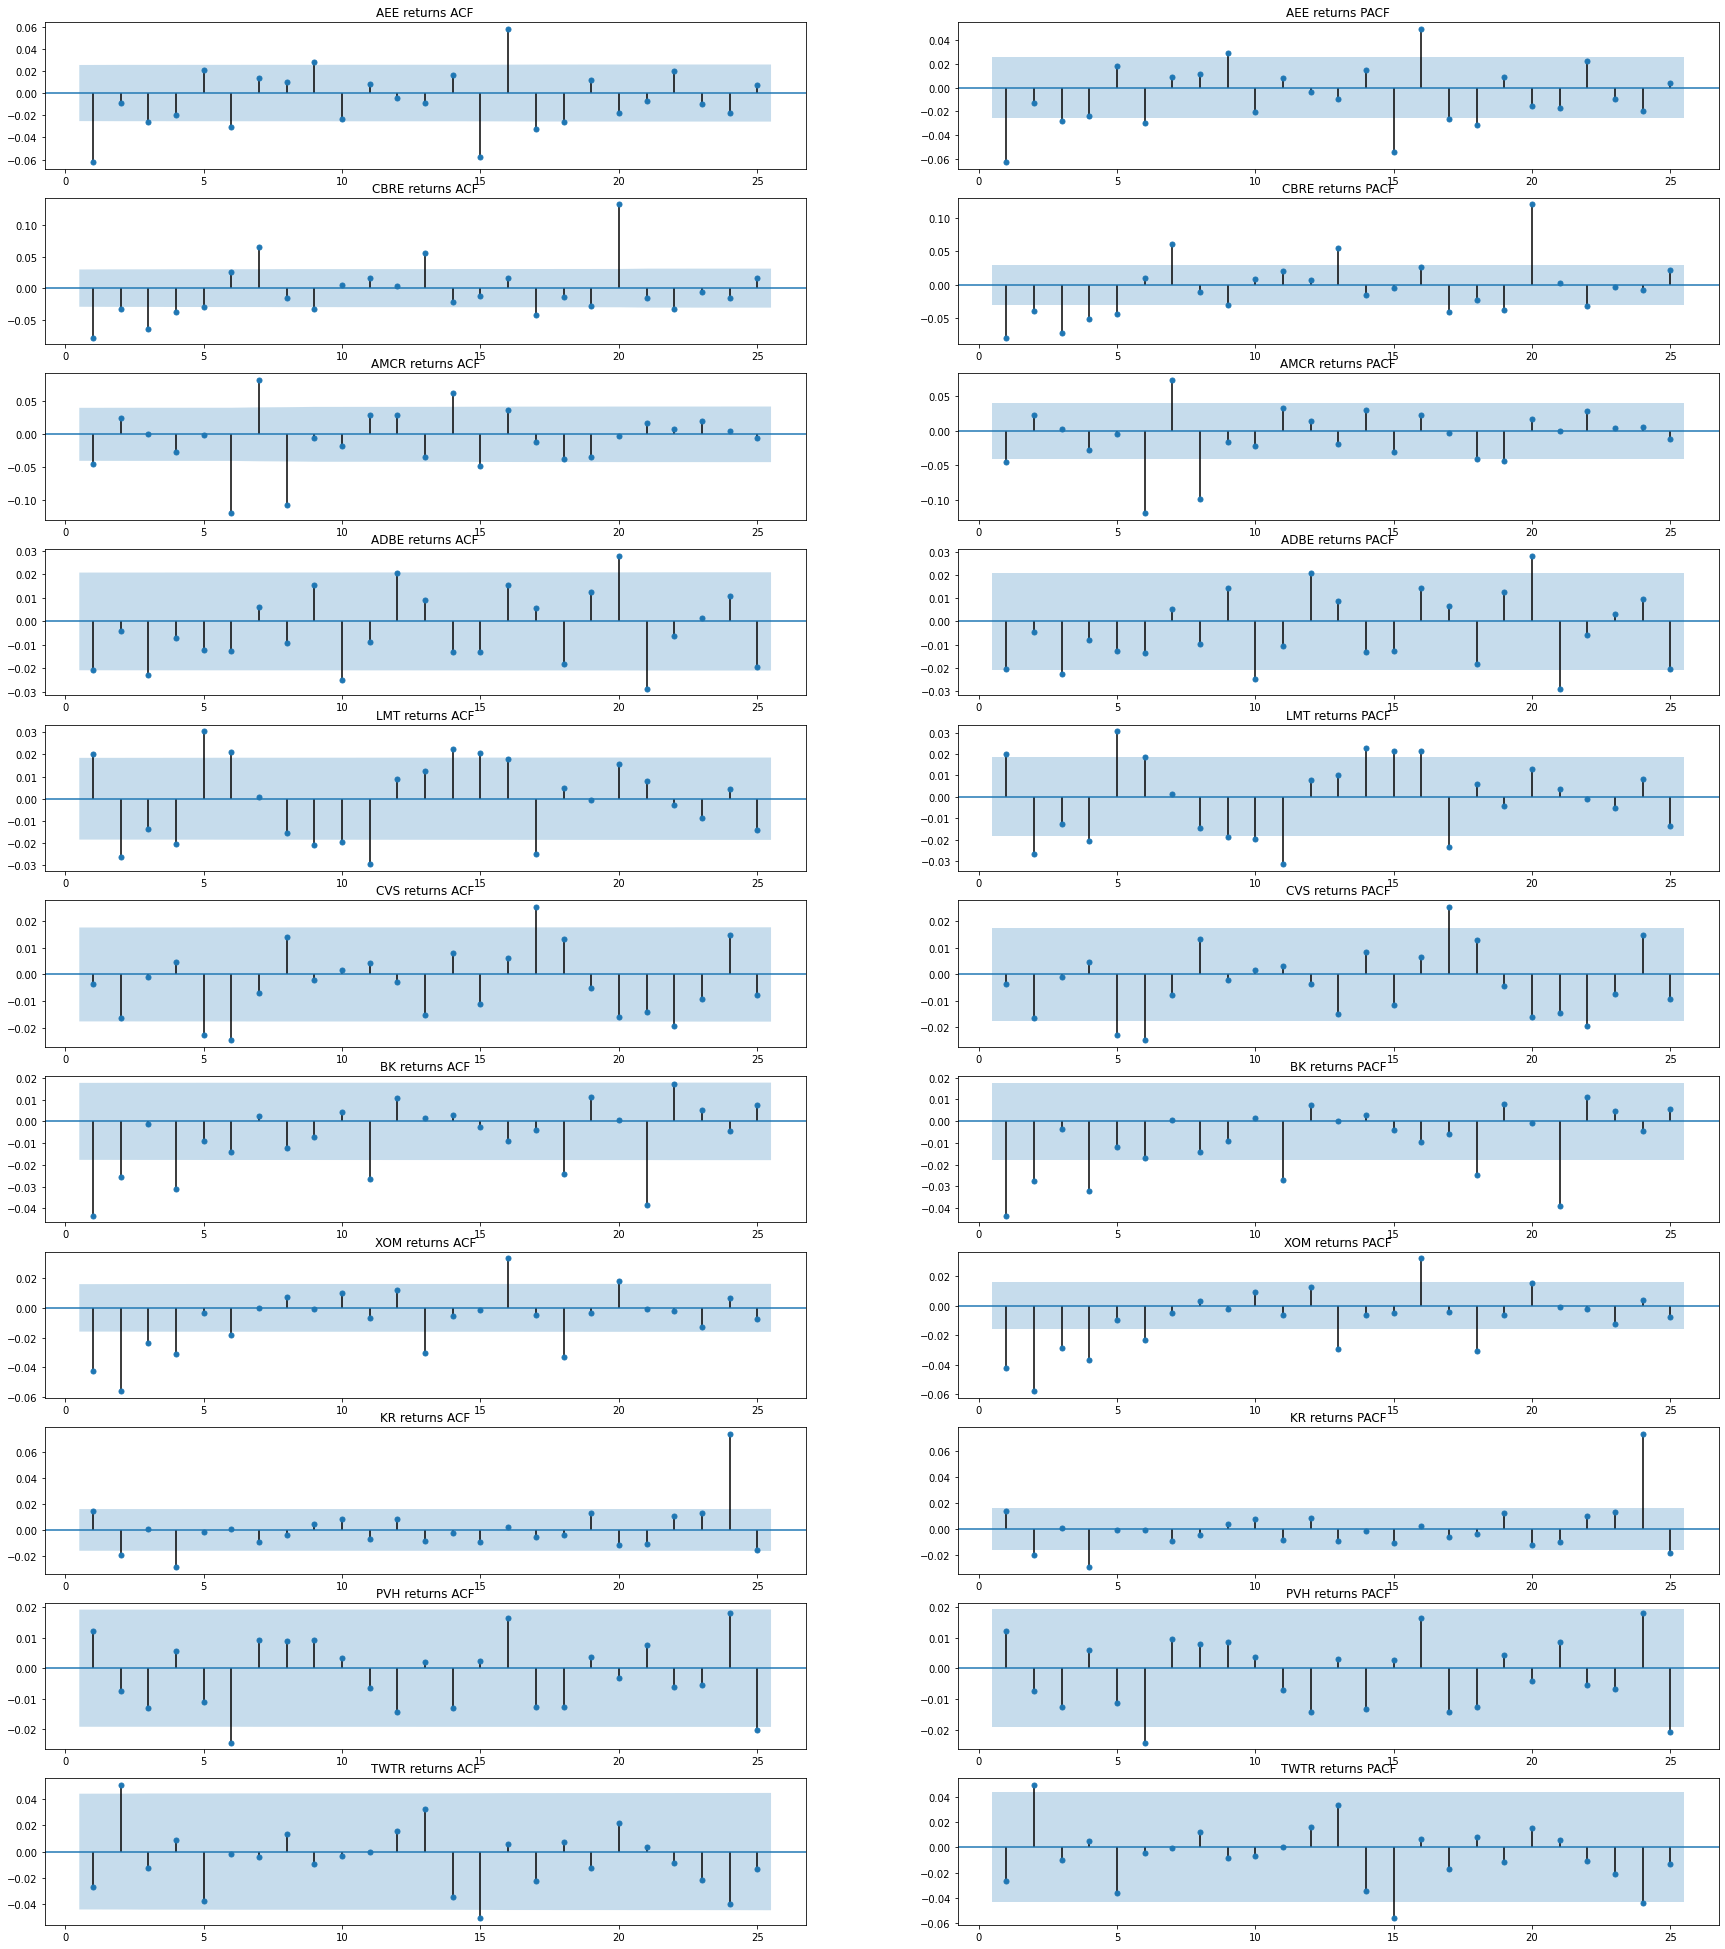

In [19]:
# Plotting ACF or PACF for stock returns
fig, axes = plt.subplots(11, 2, figsize=(30, 35))

for i, ticker in enumerate(tickers):
    returns_select = returns[ticker].dropna() 
    # Create subplots
    fig = plot_acf(returns_select, lags=25, zero=False, ax=axes[i,0], title=ticker + ' returns ACF')    
    fig = plot_pacf(returns_select, lags=25, zero=False, ax=axes[i,1], title=ticker + ' returns PACF')    

plt.show()

**ARIMA models - Theoretical propertis**

In the previous plots we investigated ACF and PACF plots for stock returns. For all of them, just from visual inspection, we can notice two characteristics - that they are infinite and decaying over time.

In the table bellow you will see theoretical ACF and PACF properties that AR (Autoregressive model), MA (Moving Average model) and ARMA (Autoregressive Moving Average model) model have.

|    Process     |                 ACF           |              PACF            |
|----------------|:-----------------------------:|-----------------------------:|
| **AR(p)**      |  Infinite, decaying over time | Finite, 0 for all orders > p |
| **MA(q)**      |  Finite, 0 for all orders > q | Infinite, decaying over time |
| **ARMA(p, q)** |  Infinite, decaying over time | Infinite, decaying over time |

Solely based on the theoretical properties of these models, if we would model stock return using univariate models, we would expect that the `ARMA models would outperform the rest`. But it's always best to do the proper model fitting and evaluation using various statistical tests to confirm which model is the best fit for for different stock returns.

Before we move onto doing proper statistical tests, lets do ETS (Error-Trend- Seasonal) decomposition. We would like to examine if there is maybe some trend in the series and to see if the mean is constant. The reason for that is because for for stationarity testing we will have to specify what is our alternative hypothesis and what we’re testing as the null hypothesis:

**Note** Not all of the ETS plots could be displayed via subplots (their position gets messed up), so istead it will be plotted only for a few stocks. We've done the ETS decoposition for all of the stock returns and obtained the same result

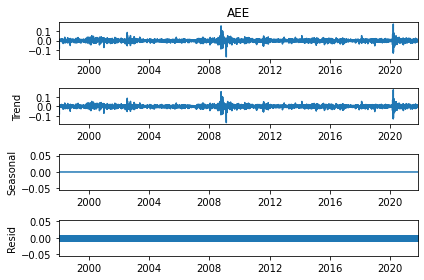

In [21]:
# ETS decomposition
iseason = seasonal_decompose(returns['AEE'].dropna(), model='additive', period=1) 
iseason.plot()
plt.show()

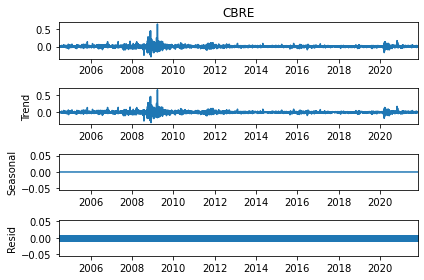

In [22]:
# ETS decomposition
iseason = seasonal_decompose(returns['CBRE'].dropna(), model='additive', period=1) 
iseason.plot()
plt.show()

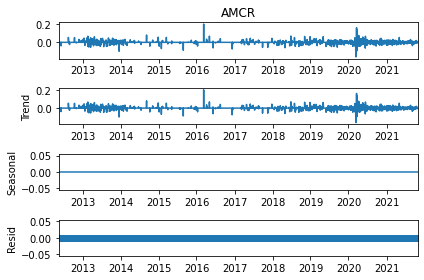

In [23]:
# ETS decomposition
iseason = seasonal_decompose(returns['AMCR'].dropna(), model='additive', period=1) 
iseason.plot()
plt.show()

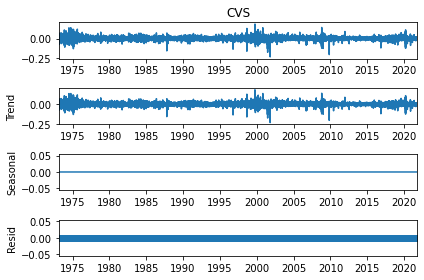

In [24]:
# ETS decomposition
iseason = seasonal_decompose(returns['CVS'].dropna(), model='additive', period=1) 
iseason.plot()
plt.show()

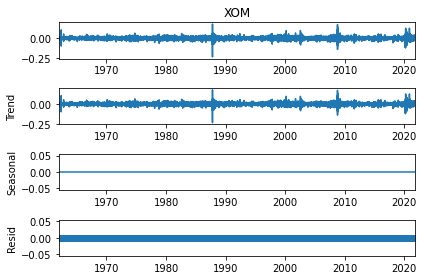

In [25]:
# ETS decomposition
iseason = seasonal_decompose(returns['XOM'].dropna(), model='additive', period=1) 
iseason.plot()
plt.show()

As we can see from the ETS plots there is neither clear seasonal component nor trend component.

#### Stationarity testing

Let's now perform formal statistical test for stationarity:

##### 1. ADF (Augmented Dickey-Fuller) test

- H0: Time series has a unit root, i.e., it is non-stationary,
- Ha: Time series does not have a unit root, and therefore it is stationary.

**Statsmodels: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [26]:
print("Non-stationary returns (p-value > 0.05 on ADF test):")

non_stationary_number = 0
for ticker in tickers:
    adf_test = adfuller(returns[ticker].dropna())

    if adf_test[1] > 0.05:
      print(ticker)
      print('ADF Statstic: %f' % adf_test[0])
      print('pvalue: %f' % adf_test[1])
      print('Critical values:')
      for ikey, ivalue in adf_test[4].items():
          print('\t%s: %.3f' % (ikey, ivalue))
      print('-'*100)

      non_stationary_number += 1

if non_stationary_number == 0:
  print("All stock returns are stationary.")

Non-stationary returns (p-value > 0.05 on ADF test):
All stock returns are stationary.


##### 2. KPSS (Kwiatkowski–Phillips–Schmidt–Shin) test

Kwiatkowski–Phillips–Schmidt–Shin (KPSS) is  stationarity tests, where the null hypothesis is that an observable time series is stationary. 

- H0: The null hypothesis is that x is level or trend stationary.
- Ha: The series has a unit root (series is not stationary).

** H0 and Ha are different compared to ADF and ERS tests (reversed hypothesis)

** Statsmodels: https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.kpss.html

Boudary point for p-value: "*The p-value of the test. The p-value is interpolated from Table 1 in Kwiatkowski et al. (1992), and a boundary point is returned if the test statistic is outside the table of critical values, that is, if the p-value is outside the interval (0.01, 0.1).*"


In [27]:
def kpss_test(timeseries, only_p_value=False):
    
    kpsstest = kpss(timeseries, regression="c", nlags="legacy")

    if only_p_value:
      return kpsstest[1]

    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print("Results of KPSS Test:")
    print(kpss_output)

In [28]:
print("Non-stationary returns (p-value < 0.05 on KPSS test):")

non_stationary_number = 0
for ticker in tickers:
  p_value = kpss_test(returns[ticker].dropna(), only_p_value=True)
  if p_value < 0.05:
    print(ticker)
    kpss_test(returns[ticker].dropna())
    non_stationary_number += 1



if non_stationary_number == 0:
  print("All stock returns are stationary.")


Non-stationary returns (p-value < 0.05 on KPSS test):
All stock returns are stationary.


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1876: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1876: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1876: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1876: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/usr/local/lib/python3.7/dis

##### 3. Zivot-Andrews structural-break unit-root test

The Zivot-Andrews test tests for a unit root in a univariate process in the presence of serial correlation and a single structural break.

- H0: unit root with a single structural break
- Ha: break stationary alternative



** Statsmodels: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.zivot_andrews.html#statsmodels.tsa.stattools.zivot_andrews




In [29]:
print("Non-stationary returns (p-value > 0.05 on Zivot-Andrews test):")

non_stationary_number = 0
for ticker in tickers:
    adf_test = zivot_andrews(returns[ticker].dropna(), regression="c", maxlag=20)

    if adf_test[1] > 0.05:
      print(ticker)
      print('ADF Statstic: %f' % adf_test[0])
      print('pvalue: %f' % adf_test[1])
      print('Critical values:')
      for ikey, ivalue in adf_test[4].items():
          print('\t%s: %.3f' % (ikey, ivalue))
      print('-'*100)

      non_stationary_number += 1

if non_stationary_number == 0:
  print("All stock returns are stationary.")

Non-stationary returns (p-value > 0.05 on Zivot-Andrews test):
All stock returns are stationary.


It seems that based on all three statistical tests that we have performed for the stationarity testing, we got the same result for all stock returns, that they are `stationary`.

**Note**: In all of the tests for the regression parameter we chose "c", idicating constant only and not the trend, since in the ETS decomposition we haven't detected any clear trend in stock returns:

- “c” : constant only (default).
- “t” : trend only.
- “ct” : constant and trend.

It was also tried with a different number of lags and we obtained the same resulet (e.g. rationale for 20 lags is one month - 20 trading days)

### (b) Outliers: As an additional check, write your own code to winsorize data in the presence of NaN values for a given set of lower and upper thresholds expressed as quantiles of the empirical stock return distribution. Compare your findings with the results obtained by using the methods scipy.stats.mstats.winsorize and pandas.DataFrame.clip.

#### Detecting outliers

Let's now plot a histogram of returns and compare them to the standard normal of those returns:

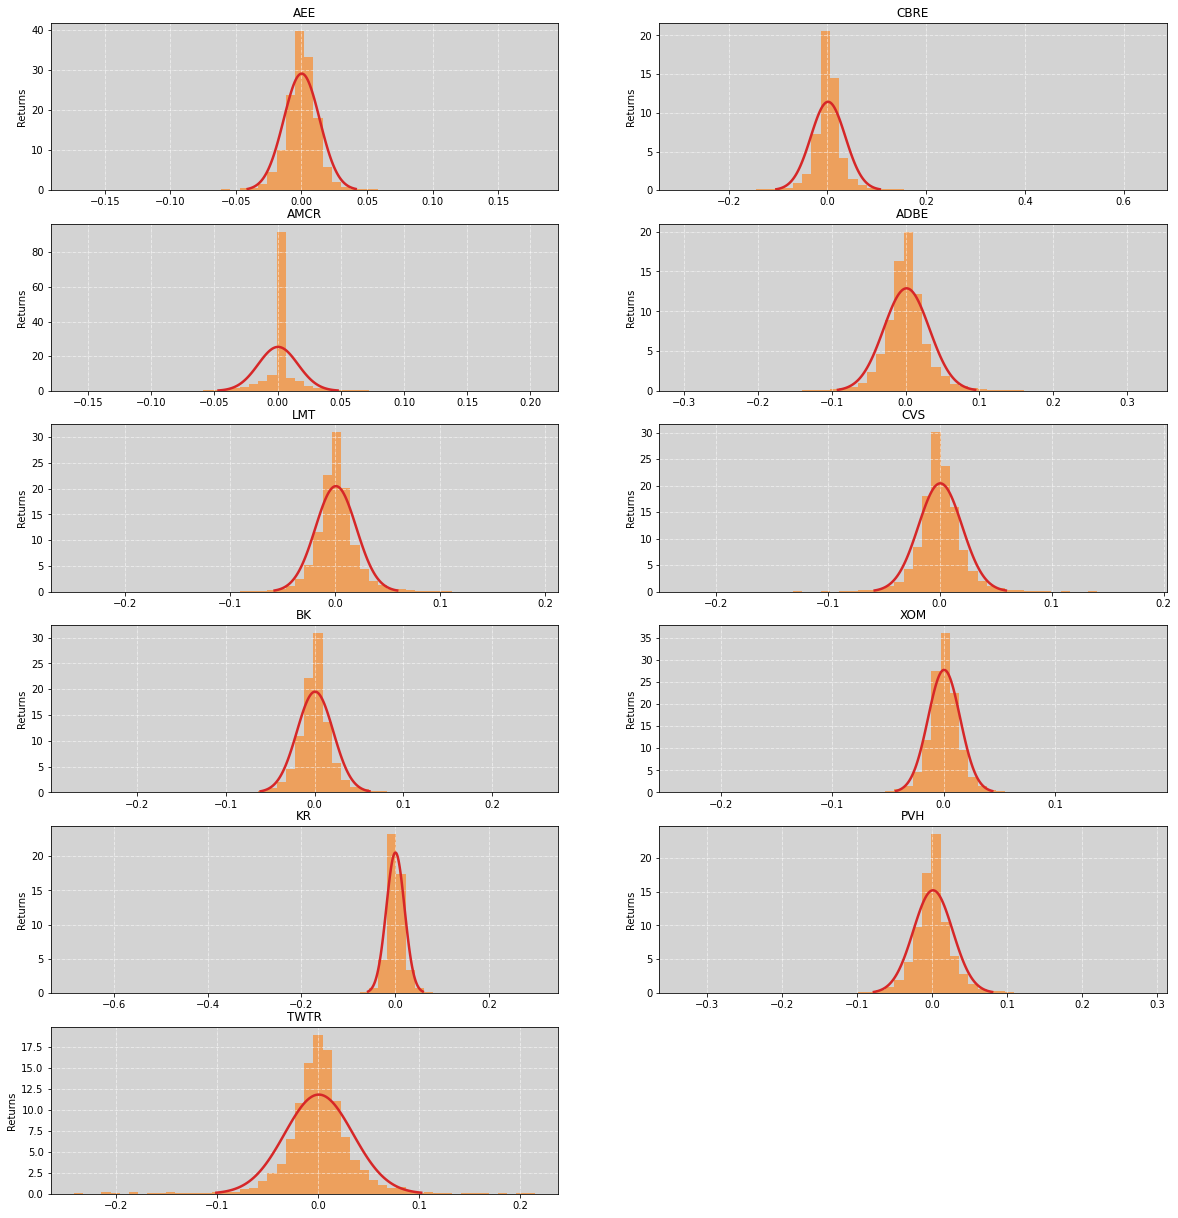

In [30]:
# Plotting returns histograms (for returns based on closing prices)
plt.figure(figsize=(20, 40))

for i, ticker in enumerate(tickers):
    # Prepare inputs for normal distribution plot overlay
    mean_val  = returns[ticker].mean()
    std_val   = returns[ticker].std()
    min_val   = returns[ticker].min()
    max_val   = returns[ticker].max()
    x_norm    = np.linspace(mean_val-3*std_val, mean_val+3*std_val, 100)
    y_norm  = scipy.stats.norm.pdf(x_norm, mean_val, std_val)
    
    # Create subplots
    plt.subplot(11, 2, i + 1)    
    returns[ticker].hist(bins=50, alpha=0.6, density=True, color='tab:orange')
    plt.plot(x_norm, y_norm, color='tab:red', linewidth=2.5)
    
    # Labels and graphics
    plt.xlabel(None)
    plt.ylabel('Returns')
    plt.title(ticker)
    plt.grid(color='white', linestyle='-.', linewidth=0.5)
    ax = plt.gca()
    ax.set_facecolor('lightgrey')

Just by visual inspecition and looking how plots are positioned, if they are centered or not we can tell a lot. E.g. we can clearly see that KR returns are skewed to the left (negatively skewed). Counter example would be CBRE returns which are leaning to the right (positively skewed). And another example are TWTR returns which look centered, but we can also notice for Twitter returns distribution that it has the fat tails - exibiting leptokutic behavior which we'll look into once we calculate kurtosis for the returns.


Similar what we saw from the return distibution histograms, we can formaly calculate the skewness and kurtosis and see now numerically what we explained previously:

* For the skewness we can see that most of them are around zero, with some stocks hihly positively and some highly negatively skewed.

* What is interesting is to observe that all stock returns exibit leptokurtic behaviour. All have positive kurtosis, with some like for KR and CBRE, really values for kurtosis.

Even without performing any normality tests, only based on visual plot inspection and based on values of skewness and kurtosis, we would expect that none of the stock returns follows a normal distribution.

In [31]:
# Compute skewness and kurtosis
print('Skewness:')
print(returns.skew())
print('-'*100)
print('Kurtosis:')
print(returns.kurt())
print('-'*100)

Skewness:
AEE    -0.127650
CBRE    2.375866
AMCR    0.782296
ADBE    0.176220
LMT     0.305914
CVS    -0.107368
BK      0.450348
XOM     0.027564
KR     -3.916334
PVH     0.280422
TWTR   -0.547131
dtype: float64
----------------------------------------------------------------------------------------------------
Kurtosis:
AEE      19.480879
CBRE     45.730085
AMCR     30.633377
ADBE      9.788979
LMT      10.439945
CVS       9.023449
BK       15.139261
XOM      14.075458
KR      137.840887
PVH      10.965982
TWTR      9.058692
dtype: float64
----------------------------------------------------------------------------------------------------


Now let's plot the box plot:

We can observe that all stock returns have many outliers (points outside of box plot "whiskers"; observations are considered outliers if their distance from the 25th/75th percentile if greater than 1.5 * IRQ).

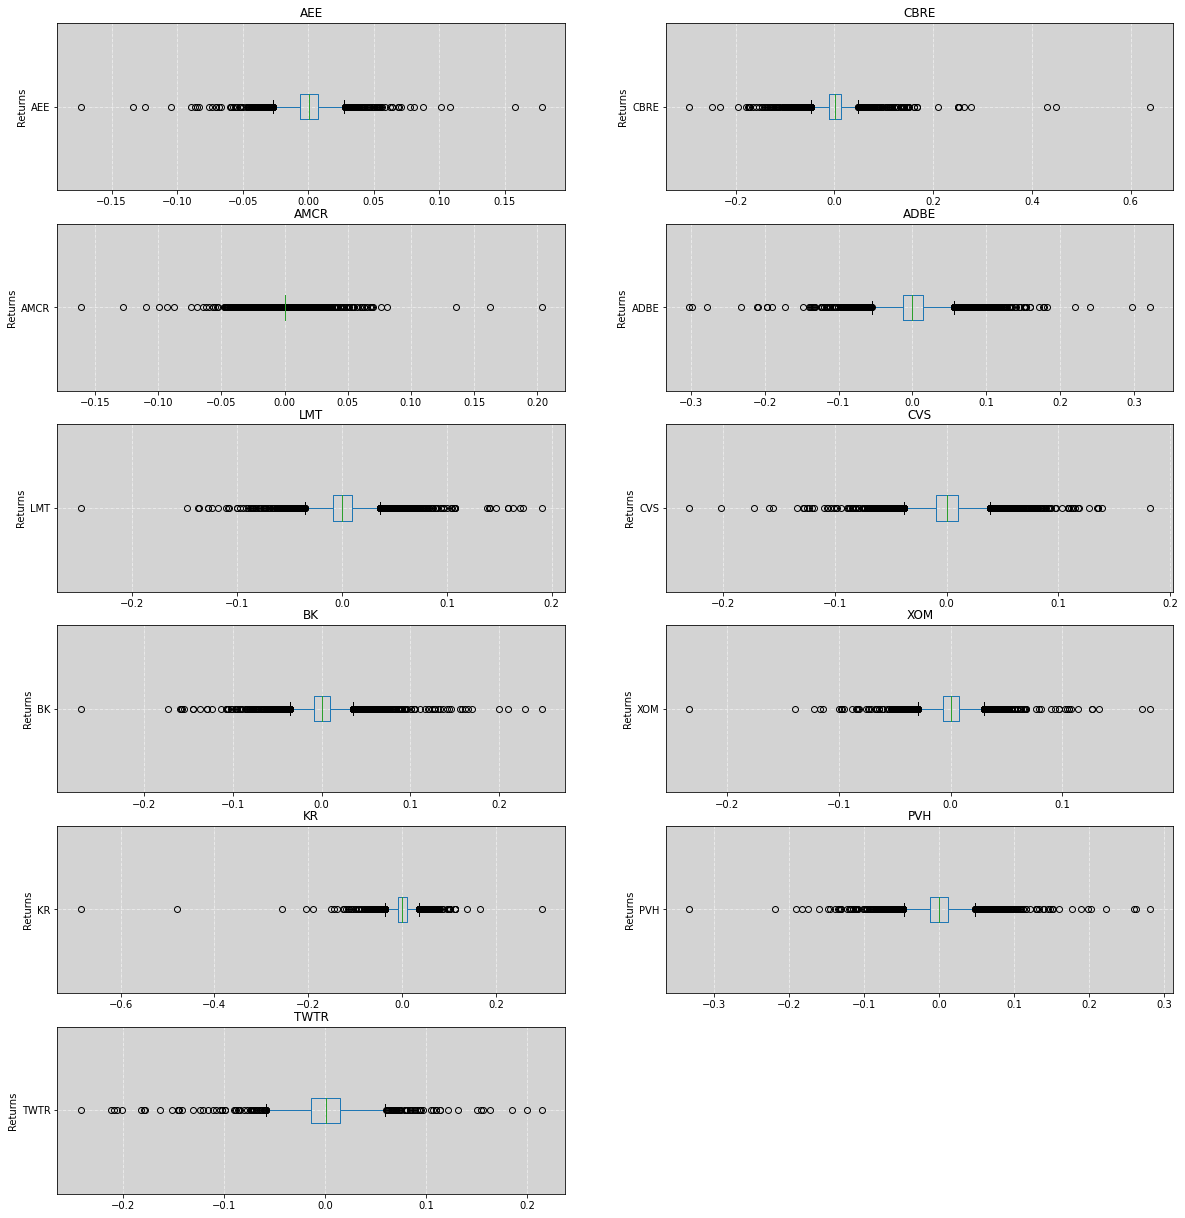

In [32]:
# Plotting returns boxplots (for returns based on closing prices)
plt.figure(figsize=(20, 40))

for i, ticker in enumerate(tickers):
    # Create subplots
    plt.subplot(11, 2, i + 1)
    returns[ticker].plot.box(vert=False)
    # Labels and graphics
    plt.xlabel(None)
    plt.ylabel('Returns')
    plt.title(ticker)
    plt.grid(color='white', linestyle='-.', linewidth=0.5)
    ax = plt.gca()
    ax.set_facecolor('lightgrey')

#### Winsorising returs

Now we'll consider two methods for removing outliers.

Fist we'll wisorize the returns, by replacing lowest 0.5% of returns and largest 0.5% of returns with the appropriate quantiles.

In [33]:
# Create data frame with windsorized stock returns
returns_winsorized = returns.copy()

win_returns = winsorize(returns.values, limits=0.005, axis=0, nan_policy='omit')
returns_winsorized.iloc[:] = win_returns
returns_winsorized.tail()

,AEE,CBRE,AMCR,ADBE,LMT,CVS,BK,XOM,KR,PVH,TWTR
Date,,,,,,,,,,,
2021-10-21,0.001660,0.001468,-0.000831,0.009947,0.005416,0.003582,0.007250,-0.018168,-0.000509,0.014126,-0.006079
2021-10-22,0.009350,0.015340,0.010806,0.007704,0.003913,0.007598,-0.000502,0.006859,0.023664,-0.006654,-0.048318
2021-10-25,-0.006449,0.009430,-0.006579,0.005267,0.004618,0.001828,-0.005192,0.019487,0.002486,0.002233,-0.002089
2021-10-26,0.007199,-0.002955,-0.005795,-0.006909,-0.056995,0.007299,-0.005051,0.023155,-0.009174,-0.004099,-0.010948
2021-10-27,-0.010312,-0.010230,0.001665,-0.003767,-0.002922,-0.002604,-0.010998,-0.025972,-0.012012,-0.023535,-0.051830


In [34]:
# Sanity check
print('Input returns minimum:')
print(returns.min())
print('-'*100)
print('Wisorized returns minimum:')
print(returns_winsorized.min())
print('-'*100)
print('Input returns maximum:')
print(returns.max())
print('-'*100)
print('Wisorized returns maximum:')
print(returns_winsorized.max())
print('-'*100)

Input returns minimum:
AEE    -0.173750
CBRE   -0.293860
AMCR   -0.161452
ADBE   -0.301980
LMT    -0.249344
CVS    -0.229918
BK     -0.271578
XOM    -0.234286
KR     -0.685345
PVH    -0.333333
TWTR   -0.241625
dtype: float64
----------------------------------------------------------------------------------------------------
Wisorized returns minimum:
AEE    -0.033434
CBRE   -0.077599
AMCR   -0.029608
ADBE   -0.083889
LMT    -0.056995
CVS    -0.062389
BK     -0.060606
XOM    -0.044444
KR     -0.058824
PVH    -0.073317
TWTR   -0.051830
dtype: float64
----------------------------------------------------------------------------------------------------
Input returns maximum:
AEE     0.178014
CBRE    0.640000
AMCR    0.203448
ADBE    0.322032
LMT     0.190332
CVS     0.182125
BK      0.248065
XOM     0.179104
KR      0.297468
PVH     0.281381
TWTR    0.214171
dtype: float64
----------------------------------------------------------------------------------------------------
Wisorized returns 

**Note** From the sanity checks (and also from the following plots where we now again examine the winsorised data) we can see that there is a bug for winsorising the right hand size of the returns save as the one in the lectures.

Tested with the latest version 1.7.1 and older version 1.4.1 of scipy.

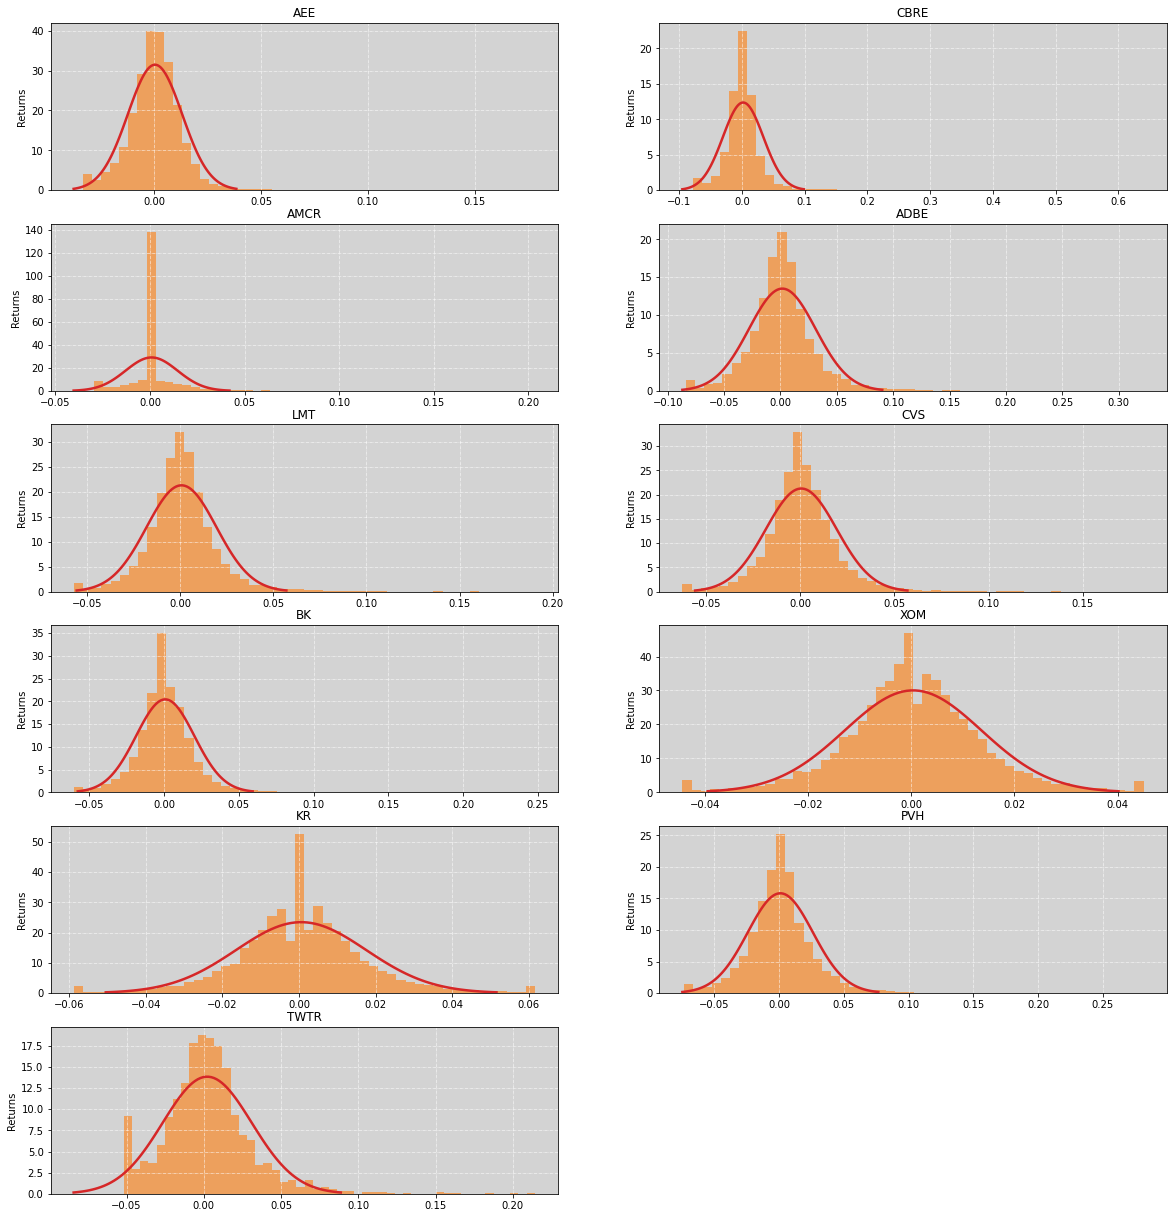

In [35]:
# Plotting returns histograms (for returns based on closing prices)
plt.figure(figsize=(20, 40))

for i, ticker in enumerate(tickers):
    # Prepare inputs for normal distribution plot overlay
    mean_val  = returns_winsorized[ticker].mean()
    std_val   = returns_winsorized[ticker].std()
    min_val   = returns_winsorized[ticker].min()
    max_val   = returns_winsorized[ticker].max()
    x_norm    = np.linspace(mean_val-3*std_val, mean_val+3*std_val, 100)
    y_norm  = scipy.stats.norm.pdf(x_norm, mean_val, std_val)
    
    # Create subplots
    plt.subplot(11, 2, i + 1)    
    returns_winsorized[ticker].hist(bins=50, alpha=0.6, density=True, color='tab:orange')
    plt.plot(x_norm, y_norm, color='tab:red', linewidth=2.5)
    
    # Labels and graphics
    plt.xlabel(None)
    plt.ylabel('Returns')
    plt.title(ticker)
    plt.grid(color='white', linestyle='-.', linewidth=0.5)
    ax = plt.gca()
    ax.set_facecolor('lightgrey')

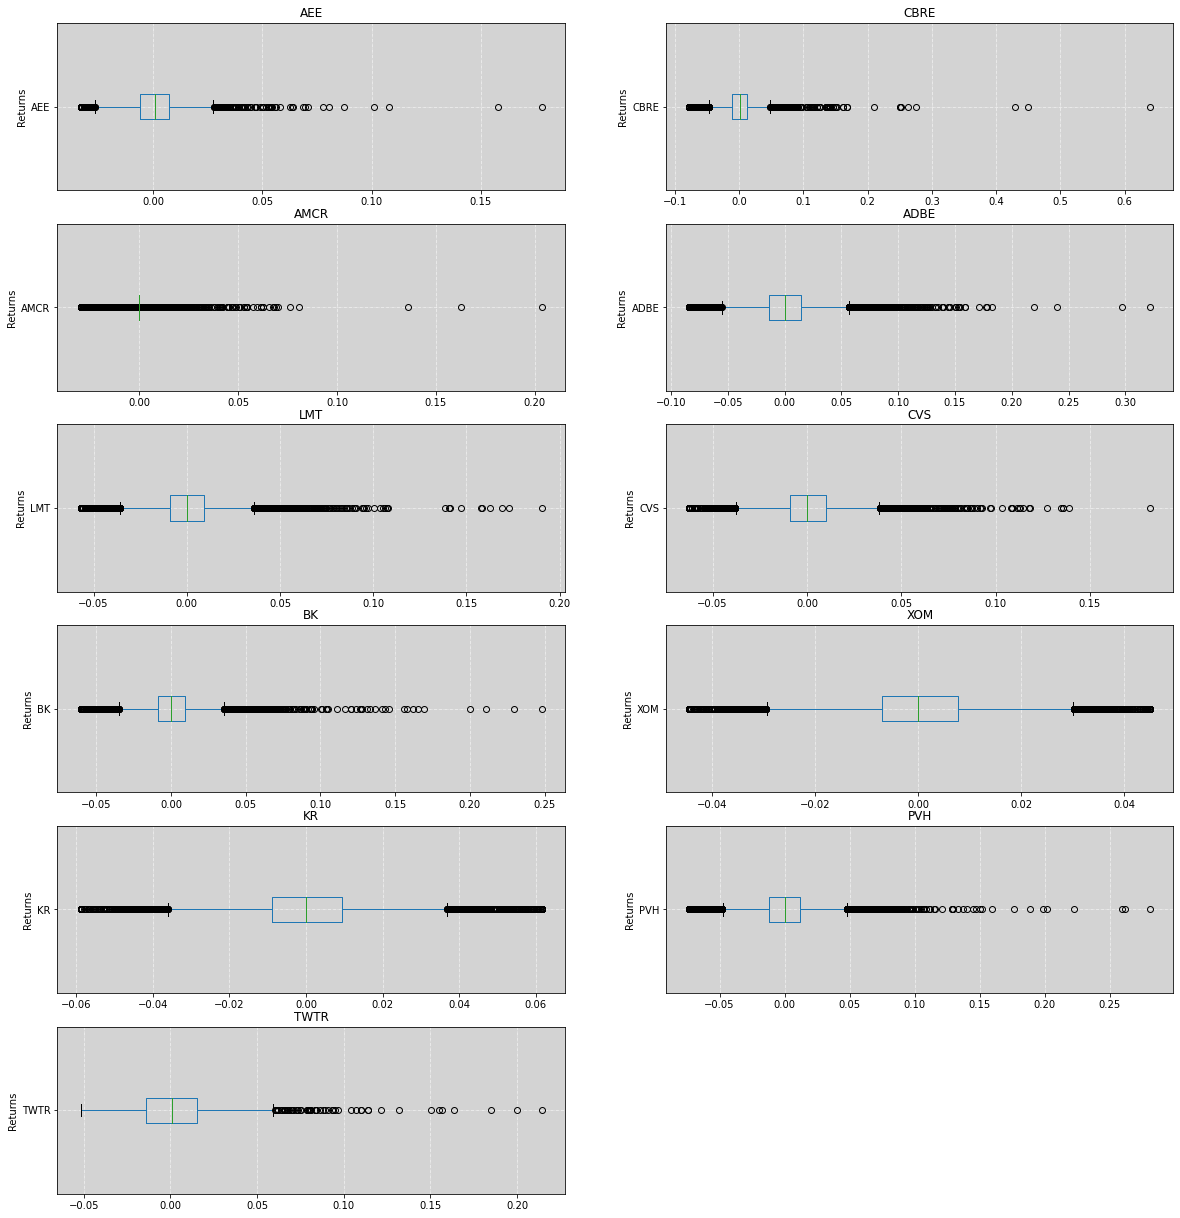

In [36]:
# Plotting returns boxplots (for returns based on closing prices)
plt.figure(figsize=(20, 40))

for i, ticker in enumerate(tickers):
    # Create subplots
    plt.subplot(11, 2, i + 1)
    returns_winsorized[ticker].plot.box(vert=False)
    # Labels and graphics
    plt.xlabel(None)
    plt.ylabel('Returns')
    plt.title(ticker)
    plt.grid(color='white', linestyle='-.', linewidth=0.5)
    ax = plt.gca()
    ax.set_facecolor('lightgrey')

##### Working solution with windorising

Trying with sigle pandas Series would work only if we first remove the NA values. But then for our 11 stocks we would have to keep a track of 11 different pandas Series with different number of observations or create a new DataFrame and add NA values for returns of the companies that are yougner copared to the others like Exxon Moblic which data we have since 1962.

Here is an example for one of the stocks - BK (Bank of New York Mellon):

In [37]:
original_returns_bk = pd.DataFrame(returns["BK"], columns=["BK"])
print(f"BK stock max return {original_returns_bk.max()}")
print(f"BK stock min return {original_returns_bk.min()}")
original_returns_bk.describe()

BK stock max return BK    0.248065
dtype: float64
BK stock min return BK   -0.271578
dtype: float64


,BK
count,12230.000000
mean,0.000508
std,0.020439
min,-0.271578
25%,-0.008547
50%,0.000000
75%,0.009091
max,0.248065


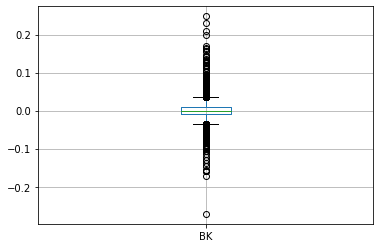

In [38]:
pd.DataFrame(original_returns_bk).boxplot()

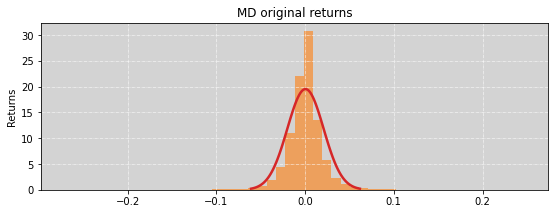

In [65]:
plt.figure(figsize=(20, 40))
mean_val  = original_returns_bk["BK"].mean()
std_val   = original_returns_bk["BK"].std()
min_val   = original_returns_bk["BK"].min()
max_val   = original_returns_bk["BK"].max()
x_norm    = np.linspace(mean_val-3*std_val, mean_val+3*std_val, 100)
y_norm  = scipy.stats.norm.pdf(x_norm, mean_val, std_val)

# Create subplots
plt.subplot(11, 2, i + 1)    
original_returns_bk["BK"].hist(bins=50, alpha=0.6, density=True, color='tab:orange')
plt.plot(x_norm, y_norm, color='tab:red', linewidth=2.5)

# Labels and graphics
plt.xlabel(None)
plt.ylabel('Returns')
plt.title(ticker + " original returns")
plt.grid(color='white', linestyle='-.', linewidth=0.5)
ax = plt.gca()
ax.set_facecolor('lightgrey')

In [40]:
winsorised_returns_bk = pd.DataFrame(winsorize(original_returns_bk["BK"].dropna(), limits=0.005, axis=0, nan_policy='omit'), columns=["BK"])
print(f"BK stock max return {winsorised_returns_bk.max()}")
print(f"BK stock min return {winsorised_returns_bk.min()}")
winsorised_returns_bk.describe()

BK stock max return BK    0.07565
dtype: float64
BK stock min return BK   -0.06599
dtype: float64


,BK
count,12230.000000
mean,0.000489
std,0.018512
min,-0.065990
25%,-0.008547
50%,0.000000
75%,0.009091
max,0.075650


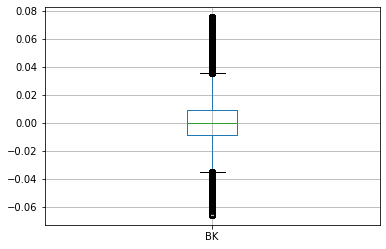

In [41]:
winsorised_returns_bk.boxplot()

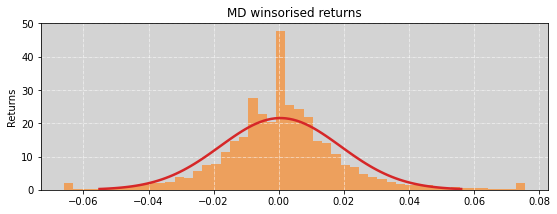

In [66]:
plt.figure(figsize=(20, 40))
mean_val  = winsorised_returns_bk["BK"].mean()
std_val   = winsorised_returns_bk["BK"].std()
min_val   = winsorised_returns_bk["BK"].min()
max_val   = winsorised_returns_bk["BK"].max()
x_norm    = np.linspace(mean_val-3*std_val, mean_val+3*std_val, 100)
y_norm  = scipy.stats.norm.pdf(x_norm, mean_val, std_val)

# Create subplots
plt.subplot(11, 2, i + 1)    
winsorised_returns_bk["BK"].hist(bins=50, alpha=0.6, density=True, color='tab:orange')
plt.plot(x_norm, y_norm, color='tab:red', linewidth=2.5)

# Labels and graphics
plt.xlabel(None)
plt.ylabel('Returns')
plt.title(ticker + " winsorised returns")
plt.grid(color='white', linestyle='-.', linewidth=0.5)
ax = plt.gca()
ax.set_facecolor('lightgrey')

Now we can see that for the BK stock we have windorised data on both the left and right hand side.

#### Clipping returns

Clippping method does the same what windorised should have done:

In [43]:
# Create data frame with clipped stock returns
returns_clipped = returns.copy()
clip_returns = returns.clip(lower=returns.quantile(0.005), upper=returns.quantile(0.995), axis=1)
returns_clipped.iloc[:] = clip_returns 
display(returns_clipped)

,AEE,CBRE,AMCR,ADBE,LMT,CVS,BK,XOM,KR,PVH,TWTR
Date,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014852,0.021008,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002439,-0.004115,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.021898,-0.024794,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002488,-0.004237,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-21,0.001660,0.001468,-0.000831,0.009947,0.005416,0.003582,0.007250,-0.018168,-0.000509,0.014126,-0.006079
2021-10-22,0.009350,0.015340,0.010806,0.007704,0.003913,0.007598,-0.000502,0.006859,0.023664,-0.006654,-0.048318
2021-10-25,-0.006449,0.009430,-0.006579,0.005267,0.004618,0.001828,-0.005192,0.019487,0.002486,0.002233,-0.002089


In [44]:
# Sanity check
print('Input returns minimum:')
print(returns.min())
print('-'*100)
print('Wisorized returns minimum:')
print(returns_clipped.min())
print('-'*100)
print('Input returns maximum:')
print(returns.max())
print('-'*100)
print('Wisorized returns maximum:')
print(returns_clipped.max())
print('-'*100)

Input returns minimum:
AEE    -0.173750
CBRE   -0.293860
AMCR   -0.161452
ADBE   -0.301980
LMT    -0.249344
CVS    -0.229918
BK     -0.271578
XOM    -0.234286
KR     -0.685345
PVH    -0.333333
TWTR   -0.241625
dtype: float64
----------------------------------------------------------------------------------------------------
Wisorized returns minimum:
AEE    -0.045697
CBRE   -0.129126
AMCR   -0.056388
ADBE   -0.097068
LMT    -0.061406
CVS    -0.064888
BK     -0.065878
XOM    -0.044425
KR     -0.058824
PVH    -0.083674
TWTR   -0.145252
dtype: float64
----------------------------------------------------------------------------------------------------
Input returns maximum:
AEE     0.178014
CBRE    0.640000
AMCR    0.203448
ADBE    0.322032
LMT     0.190332
CVS     0.182125
BK      0.248065
XOM     0.179104
KR      0.297468
PVH     0.281381
TWTR    0.214171
dtype: float64
----------------------------------------------------------------------------------------------------
Wisorized returns 

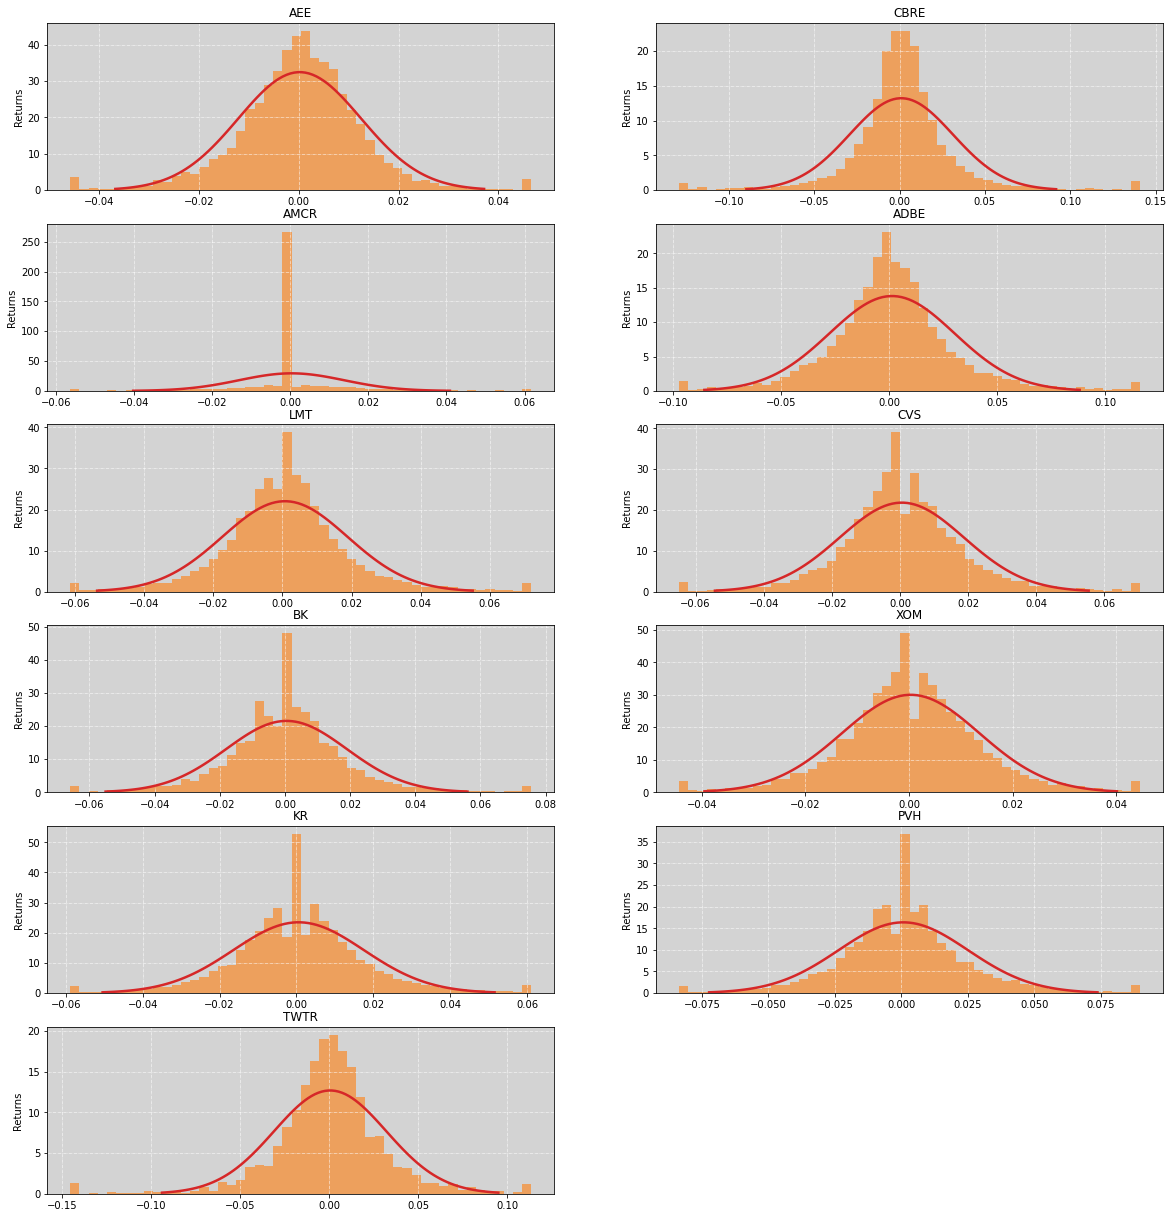

In [45]:
# Plotting returns histograms (for returns based on closing prices)
plt.figure(figsize=(20, 40))

for i, ticker in enumerate(tickers):
    # Prepare inputs for normal distribution plot overlay
    mean_val  = returns_clipped[ticker].mean()
    std_val   = returns_clipped[ticker].std()
    min_val   = returns_clipped[ticker].min()
    max_val   = returns_clipped[ticker].max()
    x_norm    = np.linspace(mean_val-3*std_val, mean_val+3*std_val, 100)
    y_norm  = scipy.stats.norm.pdf(x_norm, mean_val, std_val)
    
    # Create subplots
    plt.subplot(11, 2, i + 1)    
    returns_clipped[ticker].hist(bins=50, alpha=0.6, density=True, color='tab:orange')
    plt.plot(x_norm, y_norm, color='tab:red', linewidth=2.5)
    
    # Labels and graphics
    plt.xlabel(None)
    plt.ylabel('Returns')
    plt.title(ticker)
    plt.grid(color='white', linestyle='-.', linewidth=0.5)
    ax = plt.gca()
    ax.set_facecolor('lightgrey')

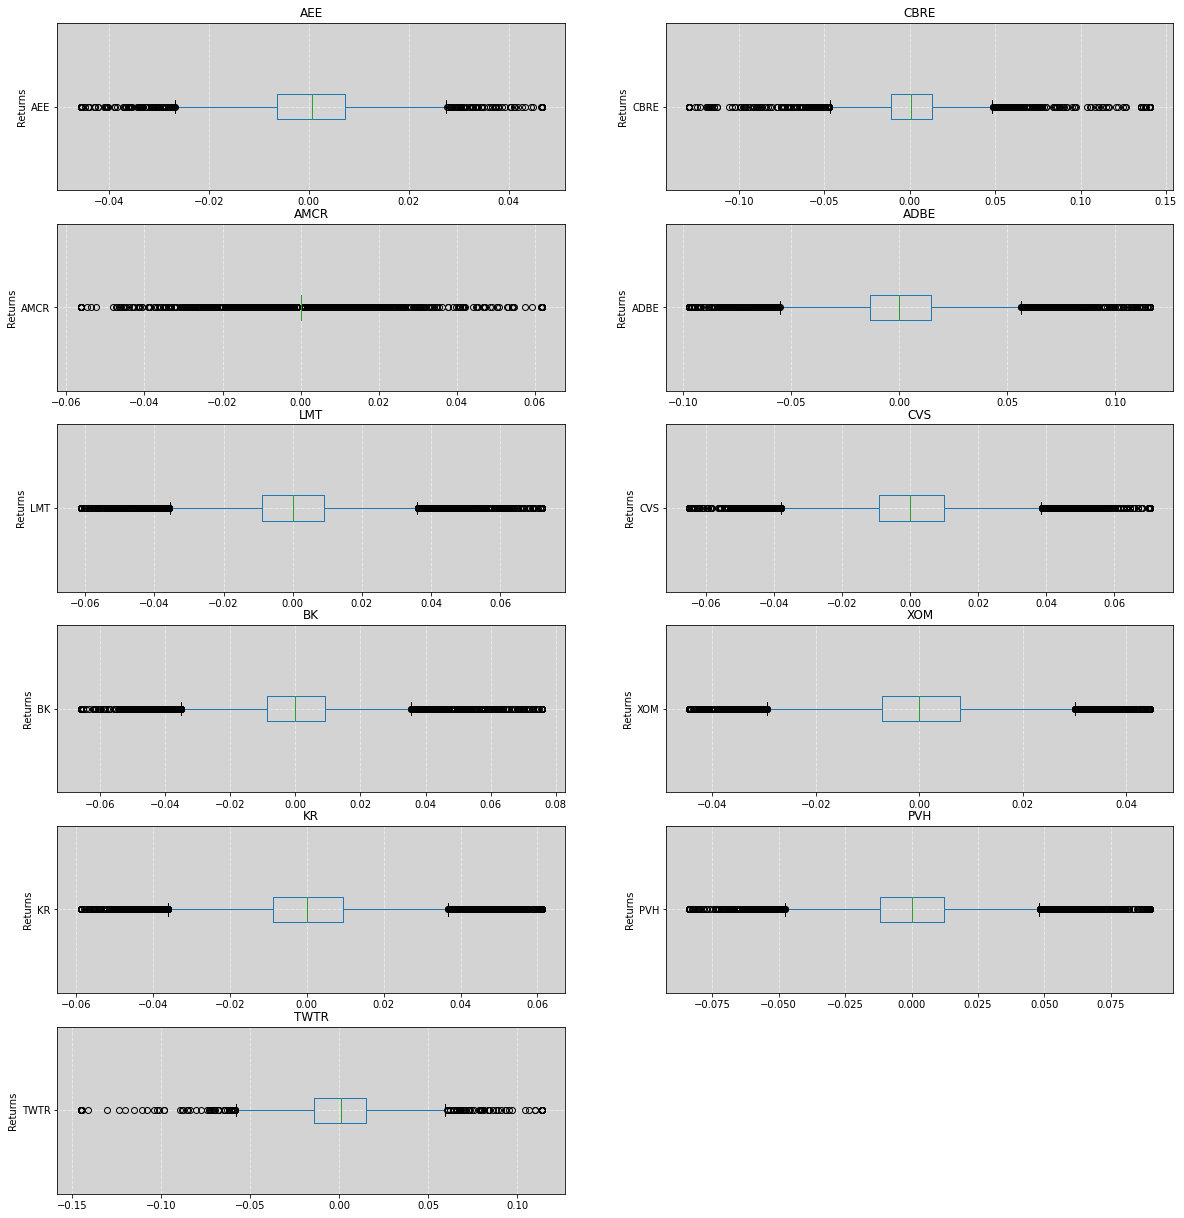

In [46]:
# Plotting returns boxplots (for returns based on closing prices)
plt.figure(figsize=(20, 40))

for i, ticker in enumerate(tickers):
    # Create subplots
    plt.subplot(11, 2, i + 1)
    returns_clipped[ticker].plot.box(vert=False)
    # Labels and graphics
    plt.xlabel(None)
    plt.ylabel('Returns')
    plt.title(ticker)
    plt.grid(color='white', linestyle='-.', linewidth=0.5)
    ax = plt.gca()
    ax.set_facecolor('lightgrey')

Now when using clipping method we achieved what we wanted in the first place wit windorising.

### (c) Normality: 

* Create Q–Q plots for each time series. Discuss the results.
* Run normality tests, e.g., Jarque–Bera, Shapiro–Wilk, Anderson–Darling, and
D’Agostino K-squared tests. Consider possible input parameters in the applied
methods, briefly describe the tests, and discuss your choices and findings.

#### QQ plots

Plotting QQ plots for original returns:

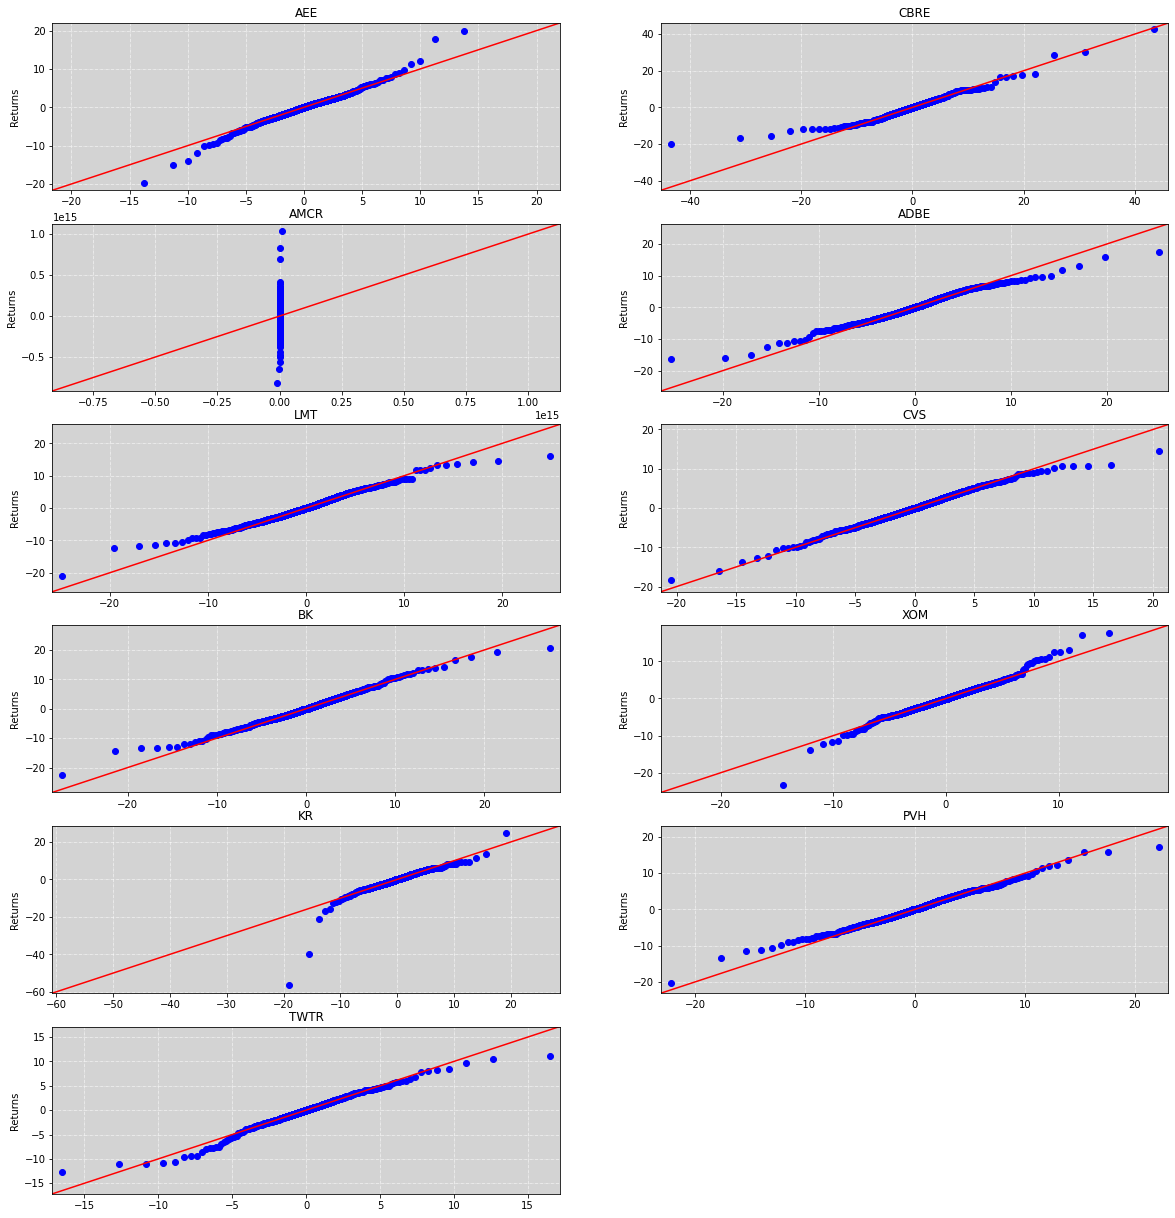

In [47]:
# Plotting returns QQ plots
plt.figure(figsize=(20, 40))

for i, ticker in enumerate(tickers):
    # Create subplots
    subplot = plt.subplot(11, 2, i + 1)
    # probplot(returns[ticker], plot=plt, dist="norm")
    qqplot(returns[ticker].dropna(), stats.t, fit=True, line="45", ax=subplot)

    # Labels and graphics
    plt.xlabel(None)
    plt.ylabel('Returns')
    plt.title(ticker)
    plt.grid(color='white', linestyle='-.', linewidth=0.5)
    ax = plt.gca()
    ax.set_facecolor('lightgrey')

Ploting QQ plots for clipped returns (outliers are removed by clipping):

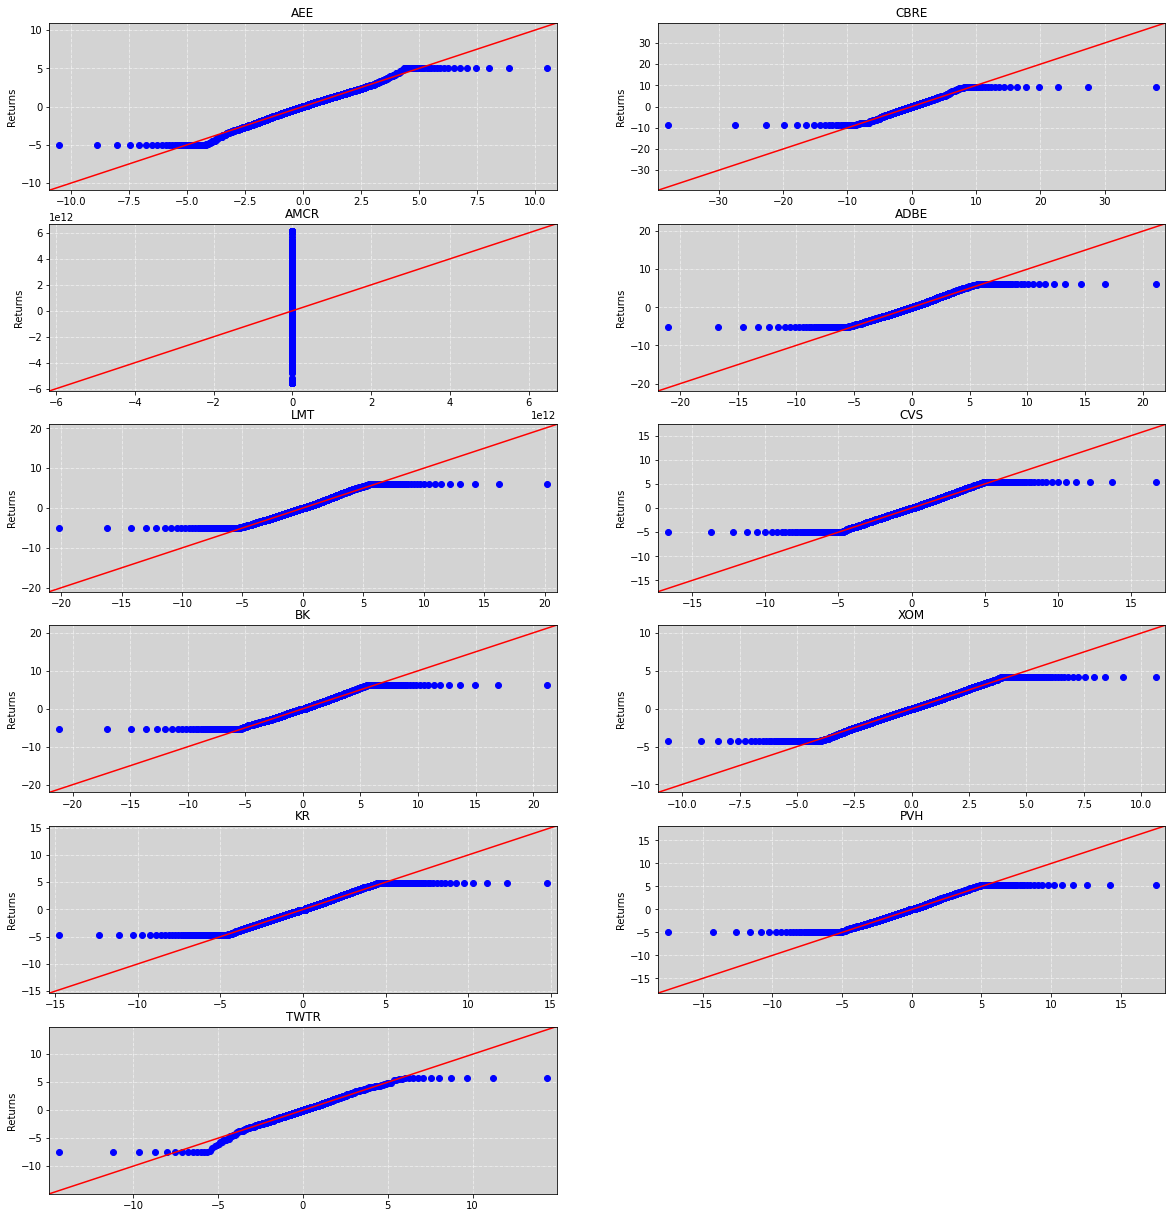

In [48]:
# Plotting clipped returns QQ plots
plt.figure(figsize=(20, 40))

for i, ticker in enumerate(tickers):
    # Create subplots
    subplot = plt.subplot(11, 2, i + 1)
    qqplot(returns_clipped[ticker].dropna(), stats.t, fit=True, line="45", ax=subplot)
    # probplot(returns_clipped[ticker], plot=plt, dist="norm")

    # Labels and graphics
    plt.xlabel(None)
    plt.ylabel('Returns')
    plt.title(ticker)
    plt.grid(color='white', linestyle='-.', linewidth=0.5)
    ax = plt.gca()
    ax.set_facecolor('lightgrey')

We can see how clipped returns are flatt on the right hand and on the left hand side (0-0.5% quantile and 99.5-100% quantile), because of the outliers we processed (clipped/winsorised).

From both sets of data we can see that the quantiles don't follow the straight line representing normal distribution. We have an another evidence that the returns don't follow the normal distribution.

#### Normality tests

Let's now perform some formal statistical tests to check if returns follow normal distribution:

##### 1. Jarque-Bera test

Jarque-Bera normality test is statistical test which checks if distribution follows normal distribution. 

* H0: Series follow normal distibution 
* Ha: Series doesn't follow normal distibution

This test takes both deviation in the skewness and in the kurtosis.

For all stock returns we got that p-value is really small, so we reject the null hypothesis. 

In [49]:
print("Returns that follow normal distribution (p-value > 0.05 on Jarque-Bera test):")

normal_returns = 0
for ticker in tickers:
  jarque_bera_test = stats.jarque_bera(returns_clipped[ticker].dropna())
  if jarque_bera_test.pvalue > 0.05:
    print(ticker)
    print(f"p-value {jarque_bera_test.pvalue}")
    print("-"*10)

if normal_returns == 0:
  print("None of the stock returns follow normal distribution.")

Returns that follow normal distribution (p-value > 0.05 on Jarque-Bera test):
None of the stock returns follow normal distribution.


##### 2. Shapiro–Wilk test

Shapiro–Wilk normality test is statistical test which checks if distribution follows normal distribution. 

* H0: Series follow normal distibution 
* Ha: Series doesn't follow normal distibution

For all stock returns we got that p-value is really small, so we reject the null hypothesis. 

In [50]:
print("Returns that follow normal distribution (p-value > 0.05 on Shapiro–Wilk test):")

normal_returns = 0
for ticker in tickers:
  shapiro_test = stats.shapiro(returns_clipped[ticker].dropna())
  if shapiro_test.pvalue > 0.05:
    print(ticker)
    print(f"p-value {shapiro_test.pvalue}")
    print("-"*10)

if normal_returns == 0:
  print("None of the stock returns follow normal distribution.")

Returns that follow normal distribution (p-value > 0.05 on Shapiro–Wilk test):
None of the stock returns follow normal distribution.


##### 3. Anderson–Darling test

Anderson–Darling normality test is statistical test which checks if distribution follows normal distribution. 

* H0: Series follow normal distibution 
* Ha: Series doesn't follow normal distibution

For all stock returns we got that test statistics is greater than the critical value (5% significance level). That means that we're inside the rejection region so we reject the null hypothesis and accept the alternative.

In [51]:
print("Returns that follow normal distribution (test statistics < critical value on Anderson-Darling test):")

normal_returns = 0
for ticker in tickers:
  anderson_test = stats.anderson(returns_clipped[ticker].dropna())
  test_statistics, critical_values, significance_level = anderson_test
  # Sifnificance level: 5%
  if test_statistics < critical_values[2]:
    print(ticker)
    print(f"Test statistics: {test_statistics}")
    print(f"Critical values: {critical_values}")
    print(f"Significance level: {significance_level}")
    print("-"*10)

if normal_returns == 0:
  print("None of the stock returns follow normal distribution.")

Returns that follow normal distribution (test statistics < critical value on Anderson-Darling test):
None of the stock returns follow normal distribution.


### (d) Scaling: Standardize the returns by subtracting the mean and scaling to unit variance. Would you consider interval scaling instead of standardization for returns?

In [52]:
from sklearn.preprocessing import StandardScaler

# Standardizing returns
returns_scaled = returns_clipped.copy()
returns_scaled[tickers] = StandardScaler().fit_transform(returns_clipped[tickers])
returns_scaled.tail()


,AEE,CBRE,AMCR,ADBE,LMT,CVS,BK,XOM,KR,PVH,TWTR
Date,,,,,,,,,,,
2021-10-21,0.116565,0.015160,-0.084450,0.293918,0.259710,0.165721,0.365254,-1.393146,-0.062362,0.548684,-0.215018
2021-10-22,0.741772,0.474191,0.776006,0.216387,0.176722,0.385289,-0.053575,0.491657,1.360549,-0.304197,-1.557515
2021-10-25,-0.542668,0.278651,-0.509494,0.132172,0.215670,0.069866,-0.306933,1.442657,0.113902,0.060553,-0.088191
2021-10-26,0.566906,-0.131200,-0.451504,-0.288720,-3.429306,0.368937,-0.299306,1.718893,-0.572463,-0.199342,-0.369779
2021-10-27,-0.856664,-0.371942,0.100096,-0.180093,-0.200628,-0.172428,-0.620641,-1.980913,-0.739497,-0.997006,-3.446936


In [53]:
# Standardized returns
returns_scaled.describe()

,AEE,CBRE,AMCR,ADBE,LMT,CVS,BK,XOM,KR,PVH,TWTR
count,5.994000e+03,4.376000e+03,2.379000e+03,8.874000e+03,1.130300e+04,1.228000e+04,1.223000e+04,1.505900e+04,1.505900e+04,1.049400e+04,2.006000e+03
mean,3.487738e-17,3.926120e-17,-3.014729e-17,4.482053e-17,-3.248505e-17,5.477658e-17,-2.750593e-18,5.691561e-18,-2.255908e-16,-4.723791e-17,-2.877946e-18
std,1.000083e+00,1.000114e+00,1.000210e+00,1.000056e+00,1.000044e+00,1.000041e+00,1.000041e+00,1.000033e+00,1.000033e+00,1.000048e+00,1.000249e+00
min,-3.733364e+00,-4.306310e+00,-4.192442e+00,-3.405162e+00,-3.429306e+00,-3.577111e+00,-3.585603e+00,-3.370601e+00,-3.495018e+00,-3.465245e+00,-4.638407e+00
25%,-5.345312e-01,-3.972331e-01,-2.303462e-02,-5.085442e-01,-5.223967e-01,-5.313017e-01,-4.882238e-01,-5.598953e-01,-5.474602e-01,-5.140897e-01,-4.677472e-01
50%,2.590661e-02,-4.520469e-03,-2.303462e-02,-4.989975e-02,-3.928689e-02,-3.007109e-02,-2.644182e-02,-2.491672e-02,-3.242033e-02,-3.109204e-02,9.305388e-03
75%,5.719197e-01,3.912691e-01,-2.303462e-02,4.546906e-01,4.677719e-01,5.143139e-01,4.647091e-01,5.615389e-01,5.237387e-01,4.696854e-01,4.644535e-01
max,3.770171e+00,4.628375e+00,4.544313e+00,3.966502e+00,3.938015e+00,3.826556e+00,4.060299e+00,3.337933e+00,3.563363e+00,3.658690e+00,3.591528e+00


Using normalization instead of standardization?

Normalization is also known as min-max scaling or min-max normalization, it is the simplest method and consists of rescaling the range of features to scale the range in [0, 1]. The general formula for normalization is given as:

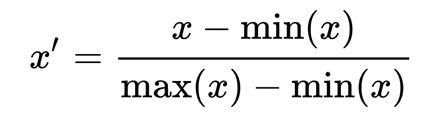

The problem with that is that we cannot anticipate what will be the highe or the lowest return. We can assume, but never know for sure. If we normalize the data in that way, if there will be some new record highs/lows it would be out-of-the-bounds.

### (e) Multivariate analysis:

#### Compute and visualize (e.g., using a heatmap) the correlation matrix. Discuss your findings, i.e., try to provide a rationale why some pairs of stocks might have higher correlation that others. To answer this question, select up to five representative figures from the correlation matrix.

**Note** For calculating correlation matrix we have to drop the NA values. That means correlation between the returns is calculated from the IPO of the youngest of 11 companies we have. The youngest company is Twitter. That means we're calculating correlations for the returns in the past 7.86 years, since 2013.

In [54]:
returns_scaled.describe().loc["count"]

AEE      5994.0
CBRE     4376.0
AMCR     2379.0
ADBE     8874.0
LMT     11303.0
CVS     12280.0
BK      12230.0
XOM     15059.0
KR      15059.0
PVH     10494.0
TWTR     2006.0
Name: count, dtype: float64

In [55]:
2006/255

7.866666666666666

Correlation matrix on standardized returns:

At the beginning of our analysis, we first looked at correlation matrix of stock prices. Now we're looking at the correlation matrix of stock returns. Copared to the first one, they are quite different.

We can see that for the stock returns there are no stocks which exibit a drastically high positive or negative correlation. There are a couple of interesting pair we can look into more details:
* CBRE is highly correlated with most of the stock (all except KR). As CBRE operates globally, since GFE real estate has recovered and reached ALTH as most of other industries. Many industries went digital and embraced the industry 4.0. revolution while retail remained mostly the same in the phisical stores. That could be the reason why CBRE returns are not as much correlated with the KR returns
* CBRE (CBRE, Real Estate) and LMT (Lockheed Martin, Industrials) are highly correlated: CBRE is onle of the largest real estate companies in the world and Lockheed Marting is one of the largest aerospace and defense companies. As real estate recovered and booming after GFC and a lot of reginal conficts in past 10 years in Africa and Middle East, new military deals between Nato states (e.g. Nato buys F-35 manufactured by LM) and the [historically highest US military budget in the last 20 years](https://www.macrotrends.net/countries/USA/united-states/military-spending-defense-budget) we can assume why due to many factors in both sectors and global economy and trade, both companies performed similarly over the last 10 years or so.
* AEE  (Ameren, Corp, Utilities) and TWTR (Twitter, Communication Services) have really low corelation, nearly equal to zero (0.0559):  AEE is american power company and TWTR is social network plaform. One of the best perfoming cestors in the last decade was tech while AEE (power company in USA), which can grow mostly by massive investments in infrastructure. In todays world industries like that are not attractive to investors becasue they are not so great in terms of ROI compared to the tech ventures.


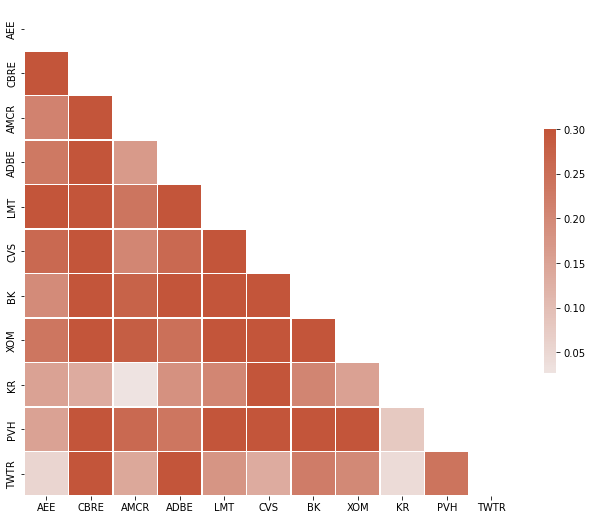

In [56]:
corr = returns_scaled.dropna().corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [57]:
corr = returns_scaled.dropna().corr()
corr

,AEE,CBRE,AMCR,ADBE,LMT,CVS,BK,XOM,KR,PVH,TWTR
AEE,1.000000,0.301239,0.212690,0.229945,0.371331,0.262505,0.196137,0.236134,0.150487,0.150787,0.056187
CBRE,0.301239,1.000000,0.306806,0.386337,0.414892,0.347498,0.571612,0.492969,0.134840,0.523859,0.304399
AMCR,0.212690,0.306806,1.000000,0.166694,0.238190,0.204040,0.272875,0.281528,0.026265,0.259681,0.142130
ADBE,0.229945,0.386337,0.166694,1.000000,0.357042,0.259996,0.311635,0.246955,0.183167,0.235476,0.379949
LMT,0.371331,0.414892,0.238190,0.357042,1.000000,0.378172,0.415972,0.369191,0.204983,0.316286,0.177482
CVS,0.262505,0.347498,0.204040,0.259996,0.378172,1.000000,0.415147,0.366100,0.331888,0.317062,0.133923
BK,0.196137,0.571612,0.272875,0.311635,0.415972,0.415147,1.000000,0.536671,0.206104,0.480992,0.225134
XOM,0.236134,0.492969,0.281528,0.246955,0.369191,0.366100,0.536671,1.000000,0.153533,0.470620,0.200329
KR,0.150487,0.134840,0.026265,0.183167,0.204983,0.331888,0.206104,0.153533,1.000000,0.078678,0.044632
PVH,0.150787,0.523859,0.259681,0.235476,0.316286,0.317062,0.480992,0.470620,0.078678,1.000000,0.239691


#### Calculate the Mahalanobis distance (MD) for the selected eleven stocks (i.e., exclude the S&P 500 index). Download daily time series of the CBOE volatility index (VIX), and plot the MD and VIX in the same graph. Discuss your findings.

In [58]:
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

In [59]:
# Calculating mahalanobis distance (MD)
mahalanobis_distance = mahalanobis(x=returns_scaled.dropna(), data=returns_scaled[tickers].dropna())
mahalanobis_distance

array([21.90868239,  4.06656409,  7.44198887, ...,  5.05244797,
       42.45861057, 17.88213662])

In [60]:
# Doanloading VIX
vix = yf.download("^VIX", start="2010-01-01")
vix.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,21.680000,21.680000,20.030001,20.040001,20.040001,0
2010-01-05,20.049999,20.129999,19.340000,19.350000,19.350000,0
2010-01-06,19.590000,19.680000,18.770000,19.160000,19.160000,0
2010-01-07,19.680000,19.709999,18.700001,19.059999,19.059999,0
2010-01-08,19.270000,19.270000,18.110001,18.129999,18.129999,0


In [61]:
# Getting the same number of observations for VIX and MD
len(mahalanobis_distance), len(vix)

(2006, 2976)

In [62]:
# Constructing dataframe for plotting
vix_md = pd.DataFrame()
vix_md["VIX"] = vix.iloc[len(vix) - len(mahalanobis_distance) - 1: len(vix) - 1]["Close"]
vix_md["MD"] = mahalanobis_distance
vix_md

,VIX,MD
Date,,
2013-11-07,13.91,21.908682
2013-11-08,12.90,4.066564
2013-11-11,12.53,7.441989
2013-11-12,12.82,9.586669
2013-11-13,12.52,6.456833
...,...,...
2021-10-20,15.49,4.647273
2021-10-21,15.01,7.698572
2021-10-22,15.43,5.052448


In [63]:
# Plotting the VIX and MD

fig=go.Figure()
fig.add_trace(go.Scatter(x=vix_md.index, y=vix_md["VIX"], name="VIX"))
fig.add_trace(go.Scatter(x=vix_md.index, y=vix_md["MD"], name="MD"))
fig.update_layout(xaxis_title='Date', yaxis_title='Close', title=dict(text='VIX and MD comparison', x=0.5, y=0.87, font=dict(size=22,color='Navy')))
fig.show()

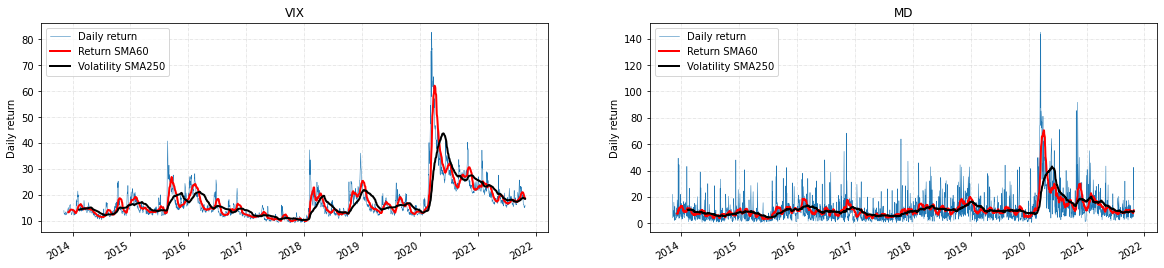

In [64]:
# Plotting VIX and MD SMA
plt.figure(figsize=(20, 30))

for i, ticker in enumerate(vix_md.columns):
    
    # Calculate rolling mean and standard deviation
    irollmean_20 =  vix_md[ticker].rolling(20).mean()
    irollmean_65 =  vix_md[ticker].rolling(65).mean()

    # Create subplots
    plt.subplot(6, 2, i + 1)
    vix_md[ticker].plot(linewidth=0.5)
    irollmean_20.plot(linewidth=2, color='red')
    irollmean_65.plot(linewidth=2, color='black')
    
    # Labels and graphics
    plt.xlabel(None)
    plt.ylabel('Daily return')
    plt.title(ticker)
    plt.legend(['Daily return', 'Return SMA60','Volatility SMA250'])
    plt.grid(color='lightgray', linestyle='-.', linewidth=0.5)

*Cboe, in its capacity as a reporting authority, calculates and disseminates the Cboe Volatility Index
commonly known as the "VIX Index" (ticker: VIX). The VIX Index is a financial benchmark designed to be
an up-to-the-minute market estimate of the expected volatility of the S&P 500® Index, and is calculated
by using the midpoint of real-time S&P 500 Index (SPX) option bid/ask quotes. More specifically, the VIX
Index is intended to provide an instantaneous measure of how much the market expects the S&P 500
Index will fluctuate in the 30 days from the time of each tick of the VIX Index.*
Source: https://cdn.cboe.com/api/global/us_indices/governance/VIX_Methodology.pdf

As we're calculating MD for our 11 stocks ~ distance measure from the centroid of our miltivariate space cosistent of 11 variables/dimensions, we're essentialy calculating kind of a volatility of our 11-stock index. All of this copmanies are components of S&P500. If we would add more stocks we would expect to have the volatility even more precise and comparable for S&P500.

Based on the plot, we can see that our MD measure is more volatile. But if we denoise it and plot the SMA for the window of 20 days and 65 days (1 and 3 months), we'll see that MD is comparable to the VIX.